### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


### 1. Reading the `coupons.csv` file.


In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


### 2. Investigating the dataset for missing or problematic data.

#### First I will investigate the dataset shape:<br>
-  There are 12684 rows in the dataset<br>
-  There are 26 features in the dataset<br>

# 


In [4]:
print(data.info()) #prints an overal dataset info

#data.shape contains the dataset shape --> (12684, 26)
print('\n\nThere are ' + str(data.shape[0]) + ' rows in the dataset\n' 
     +'There are ' + str(data.shape[1]) + ' features in the dataset\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

# 

#### Exploring and transforming the dataset features:

In [5]:
# creating a data copy and keeping it as backup:

data_copy = data

data_copy.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


#### Creating a function for transforming the data. 

In [6]:
# A function is created for tranforming the data. 
# The inputs are the dataset, the name of the feature and a mapping dictionary


def transformation_fun(dataset, feature, map_dict):
    
    print("Feature's unique values before transformation:" + str(data[feature].unique()))
    
    #transforming the text data to numeric/integer 
    #(according to the given dictionary map_dict)
    dataset = dataset.replace(map_dict)
    
    #check
    print("Feature's unique values after transformation:" + str(dataset[feature].unique()))
    
    return dataset



#### Also I added a histogram plot function in order to better understand the data.

In [7]:
# creating a histogram_plotting function with fixed options:

def histogram_plotting(dataset, feature, xlabels_rotation = 360):
    #showing a histogram to better understand the data for users who accepted the coupon:
    sns.displot(dataset.query('Y == 1')[feature], color = 'green', edgecolor = 'white')
     
    plt.xticks(rotation = xlabels_rotation) # fixing rotation of the x-axis labels
    plt.title('Distribution plot of ' + feature) # title 
    plt.show() # show the plot

<b> Below are the transformations of:
- `destination`
- `passenger`
- `weather`
- `time`
- `gender`
- `age`
- `maritalStatus`
- `expiration`
- `education`
- `income`

- Transforming the `destination` feature:

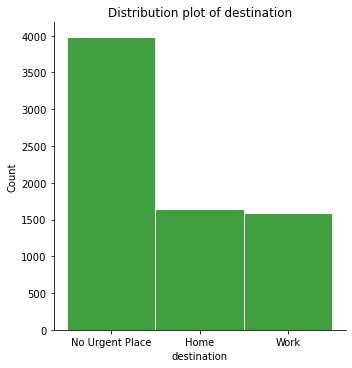

Feature's unique values before transformation:['No Urgent Place' 'Home' 'Work']
Feature's unique values after transformation:[3 1 2]


In [8]:
# plotting the distribution of the feature:
histogram_plotting(data, 'destination')

# creating a mapping dictionary
map_dict = {'destination': {'Home': 1, 'Work': 2, 'No Urgent Place': 3 } }

# transforming the feature's values:
data = transformation_fun(dataset = data,
                          feature = 'destination',
                          map_dict = map_dict)

# 

-  Transforming the `passenger` feature:

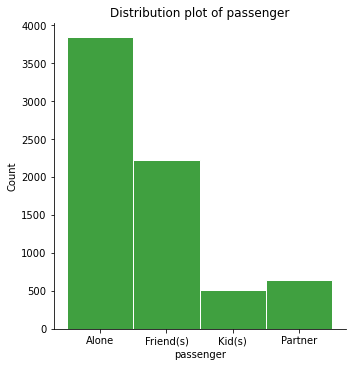

Feature's unique values before transformation:['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
Feature's unique values after transformation:[1 2 3 4]


In [9]:
# fixing the typo of passenger feature:
data = data.rename(columns={'passanger':
                     'passenger'})

# plotting the distribution of the feature:
histogram_plotting(data, 'passenger')


# creating a mapping dictionary
map_dict = {'passenger': {'Alone': 1,
                          'Friend(s)' : 2,
                          'Kid(s)': 3,
                          'Partner': 4
                          } }

# transforming the feature's values:
data = transformation_fun(dataset = data,
                          feature = 'passenger',
                          map_dict = map_dict)

# 

- Transforming the `weather` feature:

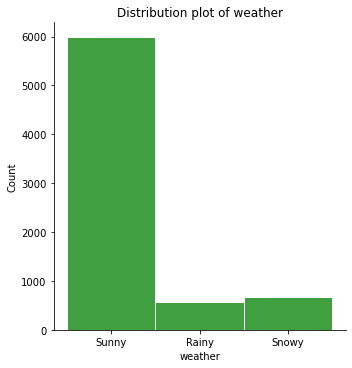

Feature's unique values before transformation:['Sunny' 'Rainy' 'Snowy']
Feature's unique values after transformation:[1 2 3]


In [10]:
# plotting the distribution of the feature:
histogram_plotting(data, 'weather')

# creating a mapping dictionary
map_dict = {'weather': {'Sunny': 1,
                        'Rainy' : 2,
                        'Snowy': 3
                          } }

# transforming the feature's values:
data = transformation_fun(dataset = data,
                          feature = 'weather',
                          map_dict = map_dict)

# 

- Transforming the `time` feature:

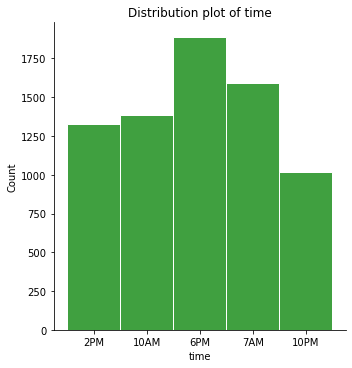

Feature's unique values before transformation:['2PM' '10AM' '6PM' '7AM' '10PM']
Feature's unique values after transformation:[14 10 18  7 22]


In [11]:
# plotting the distribution of the feature:
histogram_plotting(data, 'time')

# creating a mapping dictionary
map_dict = {'time': {'7AM': 7,
                         '10AM': 10,
                         '2PM': 14,
                         '6PM': 18,
                         '10PM': 22 
                        } }


# transforming the feature's values:
data = transformation_fun(dataset = data,
                          feature = 'time',
                          map_dict = map_dict)

# 

- Transforming the `gender` feature:

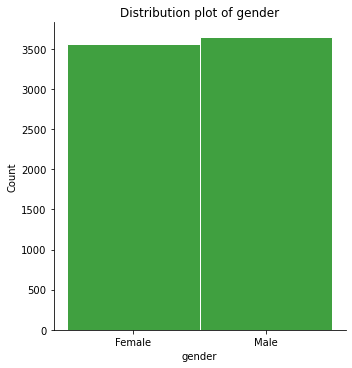

Feature's unique values before transformation:['Female' 'Male']
Feature's unique values after transformation:[1 0]


In [12]:
# plotting the distribution of the feature:
histogram_plotting(data, 'gender')

# creating a mapping dictionary
map_dict = {'gender': {'Male': 0,
                       'Female': 1
                        } }


# transforming the feature's values:
data = transformation_fun(dataset = data,
                          feature = 'gender',
                          map_dict = map_dict)

# 

- Transforming the `age` feature:

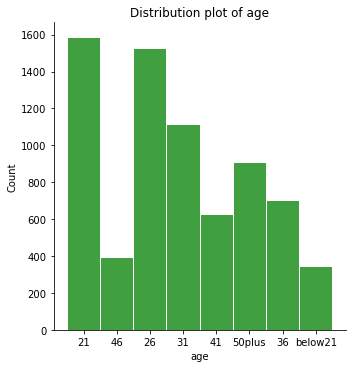

Feature's unique values before transformation:['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Feature's unique values after transformation:['21' '46' '26' '31' '41' '51' '36' '20']


In [13]:
# plotting the distribution of the feature:
histogram_plotting(data, 'age')

# creating a mapping dictionary
map_dict = {'age': {'50plus': '51' ,
                    'below21': '20'
                        } }


# transforming the feature's values:
data = transformation_fun(dataset = data,
                          feature = 'age',
                          map_dict = map_dict)


# converting the text values to integers
data['age'] = data['age'].astype(int)

# 

- Transforming the `maritalStatus` feature:

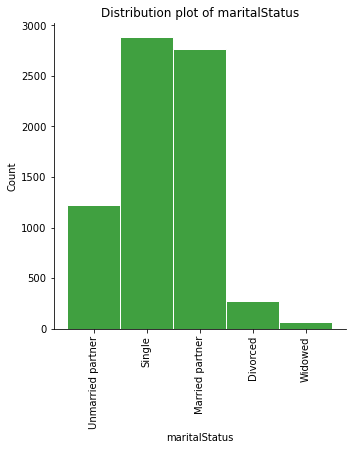

Feature's unique values before transformation:['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
Feature's unique values after transformation:[22 11 21 13 12]


In [14]:
# plotting the distribution of the feature:
histogram_plotting(data, 'maritalStatus', 90)

# creating a mapping dictionary
# mapping is int the logic 1.1, 1.2, .... 2.1 etc.
map_dict = {'maritalStatus': {'Single': 1_1,
                              'Widowed': 1_2,
                              'Divorced': 1_3,
                              'Married partner': 2_1,
                              'Unmarried partner': 2_2
                             } }


# transforming the feature's values:
data = transformation_fun(dataset = data,
                          feature = 'maritalStatus',
                          map_dict = map_dict)

# 

- Transforming the `expiration` feature:

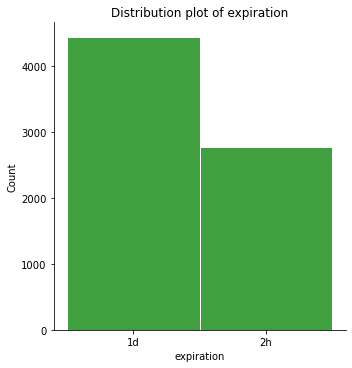

Feature's unique values before transformation:['1d' '2h']
Feature's unique values after transformation:['24h' '2h']


In [15]:
# plotting the distribution of the feature:
histogram_plotting(data, 'expiration')

# creating a mapping dictionary
map_dict = {'expiration': {'1d': '24h' } }

# transforming the feature's values:
data = transformation_fun(dataset = data,
                          feature = 'expiration',
                          map_dict = map_dict)

# 

- Transforming the `education` feature:

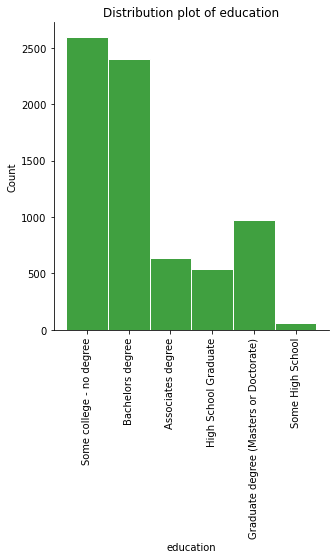

Feature's unique values before transformation:['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
Feature's unique values after transformation:[2 4 3 1 5 0]


In [16]:
# plotting the distribution of the feature:
histogram_plotting(data, 'education', 90)

map_dict = {'education':
            { 'Some High School': 0,
              'High School Graduate': 1,
              'Some college - no degree': 2,
              'Associates degree' : 3,
              'Bachelors degree': 4,
              'Graduate degree (Masters or Doctorate)': 5
            }
           }

# transforming the feature's values:
data = transformation_fun(dataset = data,
                          feature = 'education',
                          map_dict = map_dict)

# 

- Transforming the `income` feature:

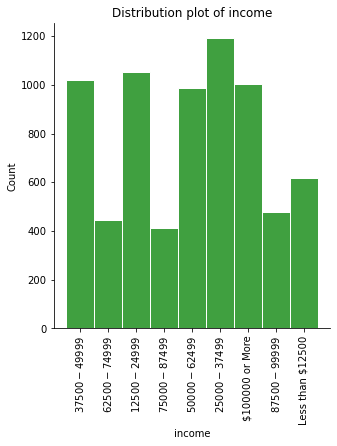

Feature's unique values before transformation:['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
Feature's unique values after transformation:[3 5 1 6 4 2 8 7 0]


In [17]:
# plotting the distribution of the feature:
histogram_plotting(data, 'income', 90)

# mapping into numeric values
map_dict = {'income': 
                            {
                             'Less than $12500': 0,
                             '$12500 - $24999': 1,
                             '$25000 - $37499': 2,
                             '$37500 - $49999': 3,
                             '$50000 - $62499': 4,
                             '$62500 - $74999': 5,
                             '$75000 - $87499': 6,
                             '$87500 - $99999': 7,
                             '$100000 or More': 8
                            } 
                 }


# transforming the feature's values:
data = transformation_fun(dataset = data,
                          feature = 'income',
                          map_dict = map_dict)

# 

#### Now, I should check the features that contain `null` values <br> and sort them accordingly, in order to decide how to handle them:

In [18]:
#isnull() masks the data with a boolean (True-False), 
#sum() counts the True boolean per feature,
#sort_values() sort the values in descending order

data.isnull().sum().sort_values(ascending=False)

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
destination                 0
passenger                   0
direction_opp               0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
occupation                  0
education                   0
has_children                0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
Y                           0
dtype: int64

#### I will calculate the percentage of null values in every feature that contains null values:

In [19]:
   ((data[['car',
      'CoffeeHouse',
      'Restaurant20To50',
      'CarryAway',
      'RestaurantLessThan20','Bar']].isnull().sum() / data.shape[0])* 100).sort_values(ascending=False)

car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
dtype: float64

#### I should also check for rows that contain `duplicates` <br> 

In [20]:
# duplicated() masks every row with a boolean 
# and sum() counts the True boolean values.

print('There are ' + str(data.duplicated().sum()) + ' duplicate rows in the original dataset\n' )

There are 74 duplicate rows in the original dataset



#### I will drop the duplicates and I will insert the results as a new dataframe named `df`.

In [21]:
df = data
df = data.drop_duplicates()

print('There are ' + str(df.duplicated().sum()) + ' duplicate rows in the df dataframe\n' )

There are 0 duplicate rows in the df dataframe



# 

#### From now on I will continue using <font color='red'>only <font> the `df` dataframe. <br>
- I will investigate the car column in order to decide later if i should drop it:

In [22]:
#car feature's unique values :

df['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

# 

- Also, I decided to do the same for the other variables that contain nulls:

In [23]:
print('CoffeeHouse:' + str(df['CoffeeHouse'].unique()) + '\n\n')

print('Restaurant20To50:' + str(df['Restaurant20To50'].unique()) + '\n\n')

print('CarryAway:' + str(df['CarryAway'].unique()) + '\n\n')

print('RestaurantLessThan20:' + str(df['RestaurantLessThan20'].unique()) + '\n\n')

print('Bar:' + str(df['Bar'].unique()) + '\n\n')

CoffeeHouse:['never' 'less1' '4~8' '1~3' 'gt8' nan]


Restaurant20To50:['1~3' 'less1' 'never' 'gt8' '4~8' nan]


CarryAway:[nan '4~8' '1~3' 'gt8' 'less1' 'never']


RestaurantLessThan20:['4~8' '1~3' 'less1' 'gt8' nan 'never']


Bar:['never' 'less1' '1~3' 'gt8' nan '4~8']




# 

### 3. Decide what to do about missing data -- drop, replace, other...

#### Dropping the car feature:

In [24]:
df = df.drop(columns = 'car')

In [25]:
# check that 'car' feature is dropped:

#creating a list of all existing columns in df and inserting it to column_names
column_names = df.columns.values.tolist() 


# a loop in column_names list 
# if 'car' exists in the list then the phrase 'not dropped' is printed

for i in column_names:
    if i == 'car':
        print('not dropped')
    else: None
#everything is ok

-  I noticed that the other features contain the same values<br>
-  In particular the values are the following: ['never' 'less1' '4-8' '1-3' 'gt8' nan]<br>
-  I decided to calculate the frequency of these values in all the features that have nulls and make a draft bar-plot for each variable

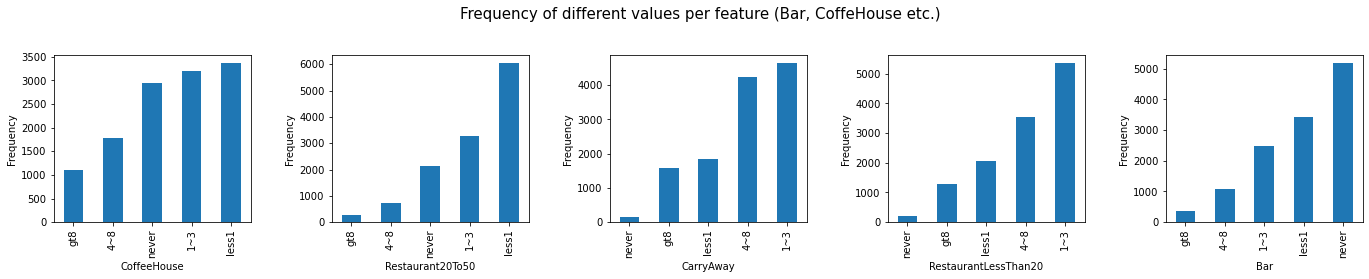

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

fig.tight_layout(pad=5.0)

df.groupby('CoffeeHouse').size().sort_values().plot(kind = 'bar', ax=axes[0])

df.groupby('Restaurant20To50').size().sort_values().plot(kind = 'bar', ax=axes[1])

df.groupby('CarryAway').size().sort_values().plot(kind = 'bar',  ax=axes[2])

df.groupby('RestaurantLessThan20').size().sort_values().plot(kind = 'bar',  ax=axes[3])

df.groupby('Bar').size().sort_values().plot(kind = 'bar',  ax=axes[4])

fig.suptitle('Frequency of different values per feature (Bar, CoffeHouse etc.)', fontsize=15)

#fig.set_xlabel('common xlabel')
for i in range(0,5):
    axes[i].set_ylabel('Frequency')


####  There are two approaches for the features that contain null values:
-  Drop the rows with missing values
-  Replace the missing values with 'never' values


#### Below, I will calculate how many of rows will remain if I drop the rows with missing data for every feature:

In [27]:
print('Total count of df rows: ' + str(df.shape[0]) + '\n\n')


print('Remaining rows after dropping rows with missing values (per feature):')

(df.shape[0] - df[['CoffeeHouse',
                          'Restaurant20To50',
                          'CarryAway',
                          'RestaurantLessThan20',
                          'Bar']].isnull().sum()).sort_values(ascending=False)



Total count of df rows: 12610


Remaining rows after dropping rows with missing values (per feature):


Bar                     12503
RestaurantLessThan20    12481
CarryAway               12460
Restaurant20To50        12421
CoffeeHouse             12393
dtype: int64

#### Let's try to drop the rows with missing values and check again the count of total rows:

In [28]:
# I use np.round() to round the result
# The df.shape[0] fetch the rows count of the dataframe
# Also I used np.round() to round the percentage to 2 decimals



print('Dropped rows: ' + str(df.shape[0] - df.dropna().shape[0]) )

print('Percentage of dropped rows (from the total): ' + str(np.round((1 - (df.dropna().shape[0] / df.shape[0])) * 100, 2)) + ' %' )

Dropped rows: 603
Percentage of dropped rows (from the total): 4.78 %


####  <font color='red'> Decision:
#### I will drop the rows with missing values from the `df` dataframe:

In [29]:
df = df.dropna()

# check: -- everything is ok!
df.isnull().sum()

destination             0
passenger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

 #### Before proceeding to calculations and data analysis I should also transform some of the features:<br>
 
- Bar
- CoffeeHouse
- CarryAway
- RestaurantLessThan20
- Restaurant20To50


#### I will transform the data of the above features as below:
- never: 0
- less1: 1
- 1-3: 2
- 4-8: 3
- gt8: 4

In [30]:
column_names = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for i in column_names:
    df[column_names] = df[column_names].replace('never', 0)
    df[column_names] = df[column_names].replace('less1', 1)
    df[column_names] = df[column_names].replace('1~3', 2)
    df[column_names] = df[column_names].replace('4~8', 3)
    df[column_names] = df[column_names].replace('gt8', 4)


In [31]:
#check: -- everything ok!
print(df['Bar'].unique())

df[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].head(2)

[0 1 2 4 3]


,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
22,0,1,3,3,1
23,0,1,3,3,1


### 4. What proportion of the total observations chose to accept the coupon? 



In [32]:
# With the query ('Y == 1') i choose only the dataframe rows where the Y == 1 (user accepts the coupon).
# Then I count the values (need only the Y column)


proportion_accepted = (df.query('Y == 1').shape[0] / df.shape[0])

print('The proportion of the total' +
      ' observations that chose to accept the coupon is: {}%'.format(np.round(proportion_accepted*100, 2))
     )

The proportion of the total observations that chose to accept the coupon is: 56.84%


#### To better understand the above percentage I will create a Pie Chart below:

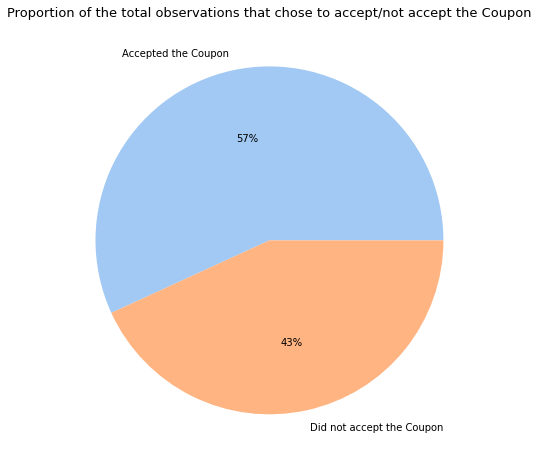

In [33]:
#defining data /  labels
for_pieplot1 = [proportion_accepted, (1 - proportion_accepted)]
labels = ['Accepted the Coupon', 'Did not accept the Coupon']

#defining the Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#creating the pie chart
plt.figure(figsize = (8, 8))

plt.title('Proportion of the total observations that chose to accept/not accept the Coupon',
         fontsize = 13)


plt.pie(for_pieplot1,
        labels = labels,
        colors = colors,
        autopct='%.0f%%')



 
plt.savefig('plots/Plot1.png', dpi = 200, bbox_inches='tight')
plt.show()

### 5. Use a bar plot to visualize the `coupon` column.

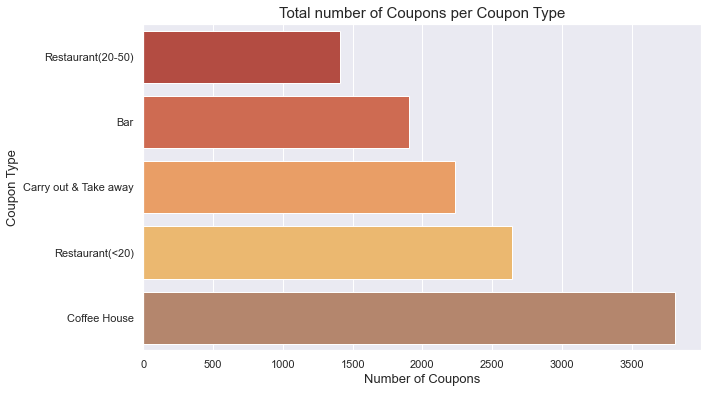

In [34]:
# i used the seaborn and matplotlib
# i preprocessed the data by grouping them by 'coupon' and then choosing a column. I chose Y column.
# i also sorted the counts per coupon type and resetted the index. I kept only 'coupon' and 'Y' columns.


for_barplot = df.groupby(['coupon']).count().sort_values(by = 'Y').reset_index()[['coupon','Y']]

sns.set_theme()

plt.figure(figsize = (10, 6))
sns.barplot(data = for_barplot,
            y ='coupon',
            x = 'Y',
            palette = ['#C63D2F',
                       '#E25E3E',
                       '#FF9B50',
                       '#FFBB5C',
                       '#C08261'] #creating a color palette with different color codes
           )

plt.title('Total number of Coupons per Coupon Type', fontsize = 15)
plt.ylabel('Coupon Type', fontsize = 13)
plt.xlabel('Number of Coupons', fontsize = 13)

plt.savefig('plots/Plot2.png', dpi = 200, bbox_inches='tight')
plt.show()

Text(0.5, 0, 'Number of Coupons')

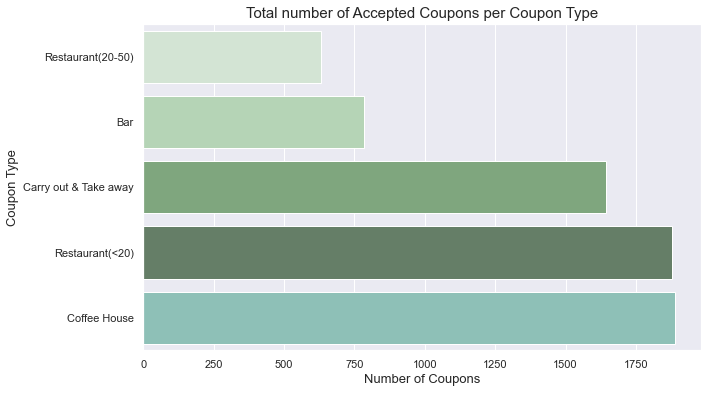

In [35]:
for_barplot = df.query('Y == 1').groupby(['coupon']).count().sort_values(by = 'Y').reset_index()[['coupon','Y']]

sns.set_theme()

plt.figure(figsize = (10, 6))
sns.barplot(data = for_barplot,
            y ='coupon',
            x = 'Y',
            palette = ['#D0E7D2',
                       '#B0D9B1',
                       '#79AC78',
                       '#618264',
                       '#86C8BC'] #creating a color palette with different color codes
           )

plt.title('Total number of Accepted Coupons per Coupon Type', fontsize = 15)
plt.ylabel('Coupon Type', fontsize = 13)
plt.xlabel('Number of Coupons', fontsize = 13)

Text(0.5, 0, 'Number of Coupons')

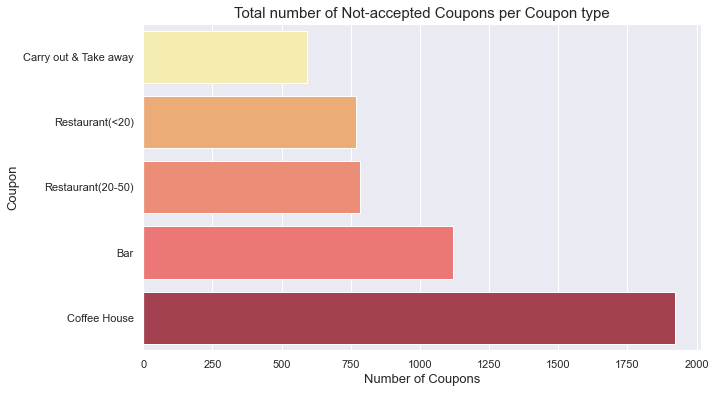

In [36]:
for_barplot = df.query('Y == 0').groupby(['coupon']).count().sort_values(by = 'Y').reset_index()[['coupon','Y']]

sns.set_theme()

plt.figure(figsize = (10, 6))
sns.barplot(data = for_barplot, 
            y ='coupon',
            x = 'Y',
            palette = ['#FFF5A5',
                       '#FFAA64',
                       '#FF8264',
                       '#FF6464',
                       '#B43144'] #creating a color palette with different color codes
           )

plt.title('Total number of Not-accepted Coupons per Coupon type', fontsize = 15)
plt.ylabel('Coupon', fontsize = 13)
plt.xlabel('Number of Coupons', fontsize = 13)

#### It is better to put both the above plots into one figure:

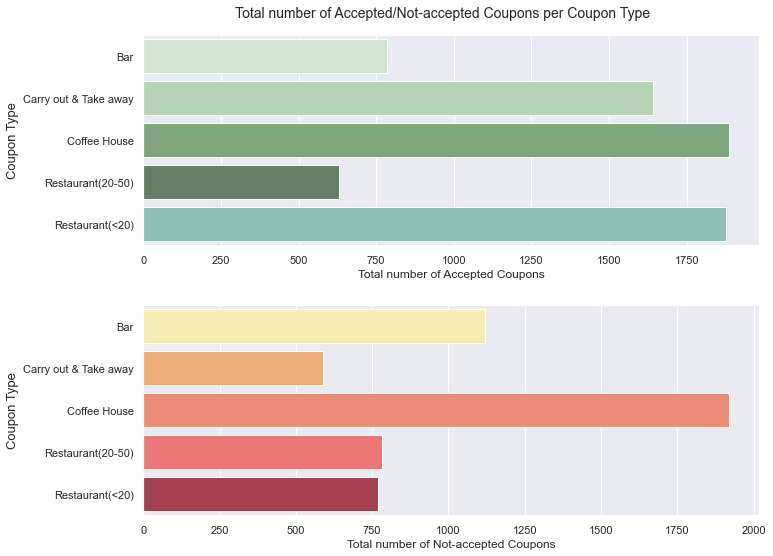

In [37]:
for_barplot_acc = df.query('Y == 1').groupby(['coupon']).count().reset_index()[['coupon','Y']]

for_barplot_not_acc = df.query('Y == 0').groupby(['coupon']).count().reset_index()[['coupon','Y']]



fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (10, 8), sharey=True)

fig.tight_layout(pad=3.0)

sns.barplot(data = for_barplot_acc,
            ax = axes[0],
            y ='coupon',
            x = 'Y',
            palette = ['#D0E7D2',
                       '#B0D9B1',
                       '#79AC78',
                       '#618264',
                       '#86C8BC'] #creating a color palette with different color codes
           )




sns.barplot(data = for_barplot_not_acc,
                y ='coupon',
                x = 'Y',
                palette = ['#FFF5A5',
                           '#FFAA64',
                           '#FF8264',
                           '#FF6464',
                           '#B43144'] #creating a color palette with different color codes
               )







#axes[0].set_title("Total number of Accepted Coupons per Coupon Type") 
#axes[1].set_title("Total number of Non-accepted Coupons per Coupon type")


# create a main title
fig.suptitle("Total number of Accepted/Not-accepted Coupons per Coupon Type", fontsize=14)

#create the y-axis labels for both subplots:
axes[0].set_ylabel('Coupon Type', fontsize = 13) 
axes[1].set_ylabel('Coupon Type', fontsize = 13) 



# set the x-axis label in the upper subplot
axes[0].set_xlabel('Total number of Accepted Coupons') 

# set the x-axis label for the bottom subplot
axes[1].set_xlabel('Total number of Not-accepted Coupons') 

plt.savefig('plots/Plot3.png', dpi = 200, bbox_inches='tight')
plt.show()


# 
### 6. Use a histogram to visualize the temperature column.

Text(0.5, 0, 'Temperatures')

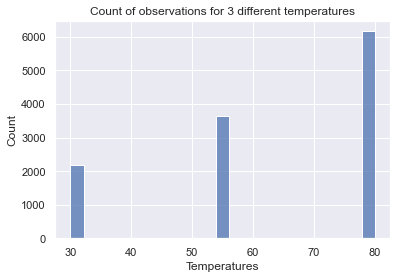

In [38]:
sns.histplot(df, x = 'temperature')

plt.title('Count of observations for 3 different temperatures')
plt.ylabel('Count')
plt.xlabel('Temperatures')

Text(0.5, 0, 'Temperatures')

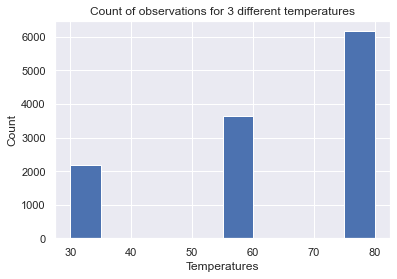

In [39]:
# another way of plotting a hist
df['temperature'].plot(kind = 'hist')

plt.title('Count of observations for 3 different temperatures')
plt.ylabel('Count')
plt.xlabel('Temperatures')


# by using the histogram logic, 
# actually we create a barplot with the count/frequency for each temperature (30, 55, 80)

# 
#### Another way - using a barplot (this is the same code logic as for the coupons barplot above)

Text(0.5, 0, 'Temperatures')

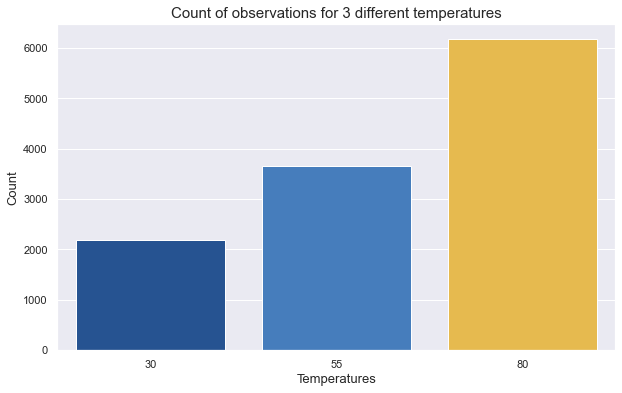

In [40]:
for_barplot = df.groupby(['temperature']).count().sort_values(by = 'Y').reset_index()[['temperature','Y']]


sns.set_theme()

plt.figure(figsize = (10, 6))
sns.barplot(data = for_barplot,
            y ='Y',
            x = 'temperature',
            palette = ['#1450A3',
                       '#337CCF',
                       '#FFC436'
                       ] #creating a color palette with different color codes
           )

plt.title('Count of observations for 3 different temperatures', fontsize = 15)
plt.ylabel('Count', fontsize = 13)
plt.xlabel('Temperatures', fontsize = 13)

# 
# 

## **Investigating the Bar Coupons**   

### 1. Creating a new `DataFrame` that contains just the bar coupons.


In [41]:
df_bar = df.query('coupon == "Bar" ')

print(type(df_bar)) # type: pandas data frame 
print(df_bar.shape) # 2010 rows, 25 features -- correct

<class 'pandas.core.frame.DataFrame'>
(1906, 25)


### 2. What proportion of bar coupons were accepted?



<b> <font color='red'> In relation to total Coupons: <font>

The proportion of the bar coupons that were accepted (in relation to total Coupons): 6.54%
The proportion of the bar coupons that were not accepted (in relation to total Coupons): 93.46%


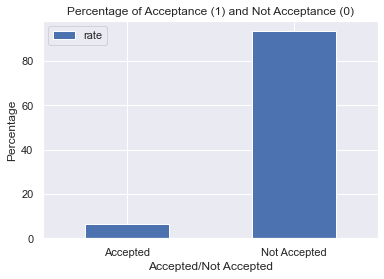

In [42]:
# similar with the calculation of acceptance proportion above.


# acceptance rate in relation to total coupons:
proportion_accepted_bar = (df_bar.query('Y == 1').shape[0] / df.shape[0])*100  #accept the coupon

proportion_NOTaccepted_bar = (100 - proportion_accepted_bar) # do not acept the coupon




print('The proportion of the bar coupons that were accepted (in relation to total Coupons): {}%'.format(np.round(proportion_accepted_bar, 2)) )

print('The proportion of the bar coupons that were not accepted (in relation to total Coupons): {}%'.format(np.round(proportion_NOTaccepted_bar, 2)) )


# creation of a dictionary with the observations
dict1 = {"rate":[proportion_accepted_bar, proportion_NOTaccepted_bar],
        "Accepted/Not Accepted":["Accepted", "Not Accepted"]}
       
# create a dataframe from the dictionary:
df_acc = pd.DataFrame.from_dict(dict1)



# plotting a simple barplot from the pandas.plot
ax = df_acc.plot(kind = 'bar', 
            x = 'Accepted/Not Accepted', 
            title = 'Percentage of Acceptance (1) and Not Acceptance (0)',
            ylabel = 'Percentage')

plt.xticks(rotation = 360)

plt.show()

<b> A Pie-Chart should better visualise the percentage results:

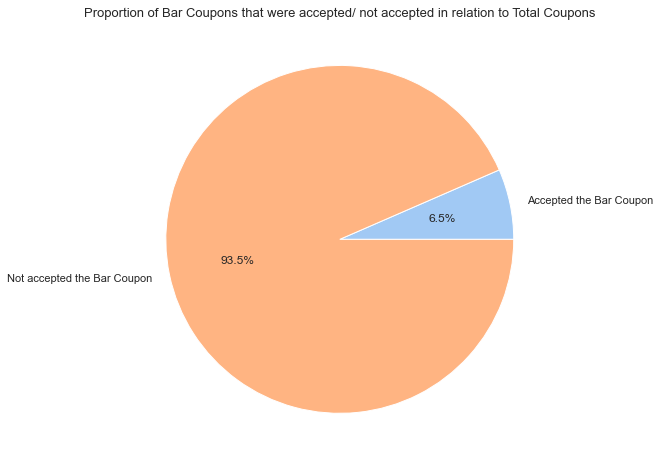

In [43]:
#defining data /  labels
for_pieplot1 = [proportion_accepted_bar, proportion_NOTaccepted_bar]
labels = ['Accepted the Bar Coupon', 'Not accepted the Bar Coupon']

#defining the Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]
                                    

#creating the pie chart
plt.figure(figsize = (8, 8))
plt.title('Proportion of Bar Coupons that were accepted/ not accepted in relation to Total Coupons',
         fontsize = 13)

plt.pie(for_pieplot1,
        labels = labels,
        colors = colors,
        autopct='%.1f%%')

plt.savefig('plots/Plot4.png', dpi = 200, bbox_inches='tight')
plt.show()

# 

 <b> <font color='red'> In relation to total Accepted Coupons:<font>

In [44]:
# code logic is similar with the above:

# acceptance rate in relation to total ACCEPTED coupons:
proportion_accepted_bar2 = (df_bar.query('Y == 1').shape[0] / df.query('Y == 1').shape[0])*100  #accept the coupon

proportion_NOTaccepted_bar2 = (100 - proportion_accepted_bar2) # do not accept the coupon


print('The proportion of the bar coupons that were accepted (in relation to total Accepted Coupons): {}%'.format(np.round(proportion_accepted_bar2, 2)) )

print('The proportion of the bar coupons that were not accepted (in relation to total Accepted Coupons): {}%'.format(np.round(proportion_NOTaccepted_bar2, 2)))



The proportion of the bar coupons that were accepted (in relation to total Accepted Coupons): 11.5%
The proportion of the bar coupons that were not accepted (in relation to total Accepted Coupons): 88.5%


In [45]:
# inserting the acceptance percentage result into a variable for later use:
bar_2 = proportion_accepted_bar2

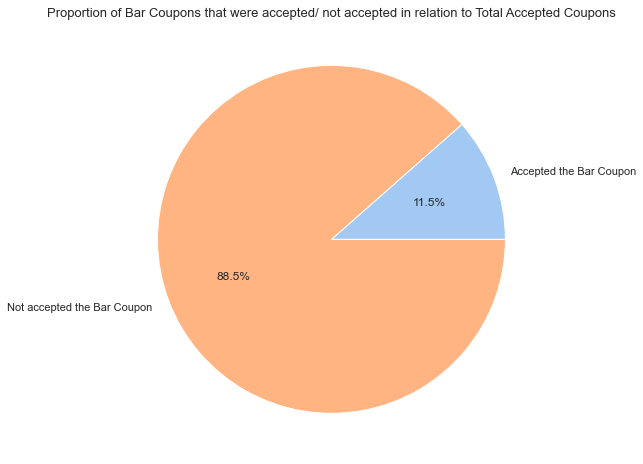

In [46]:
#defining data /  labels
for_pieplot2 = [proportion_accepted_bar2, proportion_NOTaccepted_bar2 ]
labels = ['Accepted the Bar Coupon', 'Not accepted the Bar Coupon']

#defining the Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]
                                    

#creating the pie chart
plt.figure(figsize = (8, 8))
plt.title('Proportion of Bar Coupons that were accepted/ not accepted in relation to Total Accepted Coupons',
         fontsize = 13)

plt.pie(for_pieplot2,
        labels = labels,
        colors = colors,
        autopct='%.1f%%')

plt.savefig('plots/Plot5.png', dpi = 200, bbox_inches='tight')
plt.show()

### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

<b> <font color='red'>Below I use the `df_bar` dataframe, meaning that every result will be relative to bar coupons <font>

In [47]:
# remind myself the unique values of feature Bar:
df_bar['Bar'].unique()

array([0, 1, 2, 4, 3])

<b> Filtering the dataframes:

In [48]:
#df_less_bar: I want the 'never', 'less1' and '1~3' (went to bar, 3 or less times) 
#df_more_bar: I want the 'gt8','4~8'


# total number of bar-type accepted coupons:
total_accepted_bar = df_bar.query('Y == 1').shape[0]
 
df_less_bar = df_bar.loc[(df['Bar'] <= 2)] 

df_more_bar = df_bar.loc[(df['Bar'] > 2)]

<b> Calculating the acceptance rates per visit frequency in relation to total accepted bar coupons:

In [49]:
proportion_accepted_lessbar = (df_less_bar.query('Y == 1').shape[0] / total_accepted_bar)  * 100 # (3 or fewer bar visits a month) 

proportion_accepted_morebar = (df_more_bar.query('Y == 1').shape[0] / total_accepted_bar) * 100 # (more than 3 visits)


print('The proportion of the coupons (Bar-type) that were accepted (3 or fewer bar visits per month): {}%'.format(np.round(proportion_accepted_lessbar, 2)) )

print('The proportion of the coupons (Bar-type) that were accepted (more than 3 bar visits): {}%'.format(np.round(proportion_accepted_morebar, 2)) )



The proportion of the coupons (Bar-type) that were accepted (3 or fewer bar visits per month): 81.27%
The proportion of the coupons (Bar-type) that were accepted (more than 3 bar visits): 18.73%


In [50]:
# inserting the acceptance percentage result into a variable for later use:
bar_3_less = proportion_accepted_lessbar

bar_3_more = proportion_accepted_morebar

<b> Creation of plots:

In [51]:
# creation of a dictionary with the count results
dict_temp_count = {
        "Count":[df_less_bar.query('Y == 1').shape[0], 
                 df_more_bar.query('Y == 1').shape[0]
                 ],
        
        "Bar visits frequency":["3 or fewer bar visits per month",
                                "more than 3 bar visits"
                               ]
        }

     
# create dataframes from the dictionaries:
temp_count = pd.DataFrame.from_dict(dict_temp_count) #Count resuts 

temp_perc = [proportion_accepted_lessbar, proportion_accepted_morebar] #Percentage results

Text(0.5, 1.0, 'Count of Accepted Bar-type coupons per visit frequency')

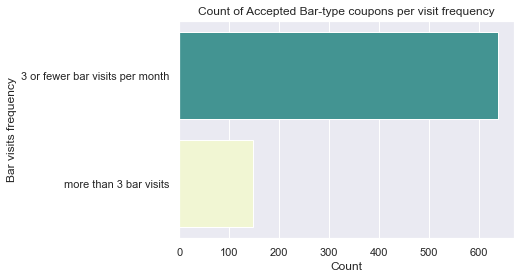

In [52]:
# bar plot of counts:
sns.barplot(data = temp_count,
            x ='Count',
            y = 'Bar visits frequency',
            palette = ['#35A29F', '#F5FCCD'])

plt.title('Count of Accepted Bar-type coupons per visit frequency')

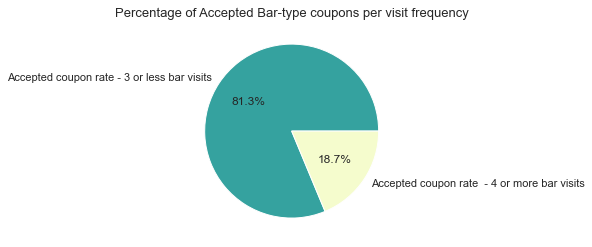

In [53]:
# pie plot of counts:
plt.pie(temp_perc,
        labels = ['Accepted coupon rate - 3 or less bar visits', 'Accepted coupon rate  - 4 or more bar visits' ],
        colors = ['#35A29F', '#F5FCCD'],
        autopct='%.1f%%')



plt.title('Percentage of Accepted Bar-type coupons per visit frequency', fontsize = 13)
plt.show()

### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

<b> <font color='red'>Below I use the `df_bar` dataframe, meaning that every result will be relative to bar coupons <font>


Following the above coding logic, I calculate the acceptance ratio for age > 25  who go to bars more than once a month:

In [54]:
# total number of bar-type accepted coupons:
total_accepted_bar = df_bar.query('Y == 1').shape[0]

In [55]:
# filtering the dataframe:
group_1 = df_bar.query('age > 25 & Bar > 1 & Y == 1').shape[0]

percentage_group_1 =(group_1 / total_accepted_bar) * 100

In [56]:
everyone_else = total_accepted_bar - group_1

percentage_everyone_else = (everyone_else / total_accepted_bar) * 100

In [57]:
# inserting the acceptance percentage result of group_1 into a variable for later use:
bar_4 = percentage_group_1

In [58]:
# creation of a dictionary with the count results
dict_temp_count = {
        "Count":[group_1, 
                 everyone_else
                 ],
        
        "Group":["Age > 25 who go to bars more than once a month",
                                "Everyone else"
                               ]
        }

     
# create dataframe from the dictionary:
temp_count = pd.DataFrame.from_dict(dict_temp_count) #Count results 

temp_perc = [percentage_group_1, percentage_everyone_else] #Percentage results

Text(0.5, 1.0, 'Count of Accepted Bar-type Coupons per group')

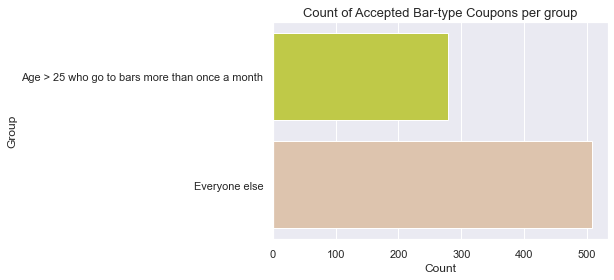

In [59]:
# bar plot of counts:
sns.barplot(data = temp_count,
            x ='Count',
            y = 'Group',
            palette = ['#D2DE32', '#E5C3A6'])

plt.title('Count of Accepted Bar-type Coupons per group', fontsize = 13)

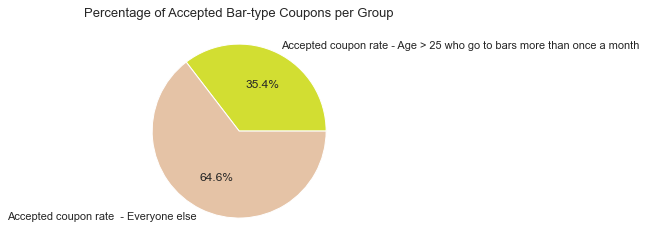

In [60]:
# pie plot of counts:
plt.pie(temp_perc,
        labels = ['Accepted coupon rate - Age > 25 who go to bars more than once a month', 'Accepted coupon rate  - Everyone else' ],
        colors = ['#D2DE32', '#E5C3A6'],
        autopct='%.1f%%')



plt.title('Percentage of Accepted Bar-type Coupons per Group', fontsize = 13)
plt.show()

### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 

<b> <font color='red'>Below I use the `df_bar` dataframe, meaning that every result will be relative to bar coupons <font>

In [61]:
# total number of bar-type accepted coupons:
total_accepted_bar = df_bar.query('Y == 1').shape[0]


# filtering the dataframe and calculating counts, percentages:
# note: kid(s) is mapped as 3
condition_text = 'Bar > 1 & passenger != 3 & occupation != "Farming Fishing & Forestry" & Y == 1'

group_2 = df_bar.query(condition_text).shape[0]

percentage_group_2 =(group_2 / total_accepted_bar) * 100

everyone_else2 = total_accepted_bar - group_2

percentage_everyone_else2 = (everyone_else2 / total_accepted_bar) * 100




#inserting the results to dataframes/lists etc.:

# creation of a dictionary with the count results

# Group 2: drivers where the passenger is not kid, 
# occupation is not "Farming Fishing & Forestry", 
# and go to bars more than once a month'

dict_temp_count = {
        "Count":[group_2, 
                 everyone_else2
                 ],
        
        "Group":['Group2',
                 'Everyone else'
                               ]
        }

     
# create dataframe from the dictionary:
temp_count = pd.DataFrame.from_dict(dict_temp_count) #Count results 

temp_perc = [percentage_group_2, percentage_everyone_else2] #Percentage results




In [62]:
# inserting the acceptance percentage result of group_2 into a variable for later use:
bar_5 = percentage_group_2

<font color='red'>CAUTION:<font>
    
- Group 2 is discribed as drivers who did not have a kid passenger, their occupation is not "Farming Fishing & Forestry" and go to bars more than once a month'

Text(0.5, 1.0, 'Count of Accepted Bar-type Coupons per group')

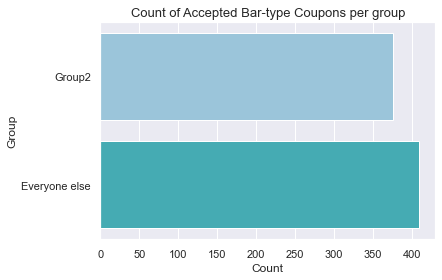

In [63]:
# bar plot of counts:
sns.barplot(data = temp_count,
            x ='Count',
            y = 'Group',
            palette = ['#91C8E4', '#33BBC5'])

plt.title('Count of Accepted Bar-type Coupons per group', fontsize = 13)

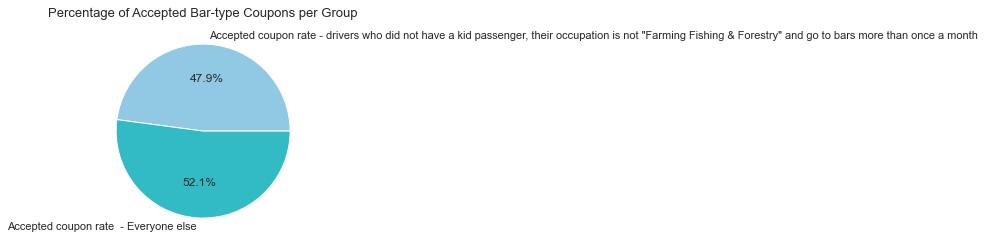

In [64]:
plt.pie(temp_perc,
        labels = ['Accepted coupon rate - drivers who did not have a kid passenger, their occupation is not "Farming Fishing & Forestry" and go to bars more than once a month', 'Accepted coupon rate  - Everyone else' ],
        colors = ['#91C8E4', '#33BBC5'],
        autopct='%.1f%%')



plt.title('Percentage of Accepted Bar-type Coupons per Group', fontsize = 13)
plt.show()

### 6. Compare the acceptance rates between those drivers who:

- <b> Condition 1: go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- <b> Condition 2: go to bars more than once a month and are under the age of 30 *OR*
- <b> Condition 3: go to cheap restaurants more than 4 times a month and income is less than 50K. 

<b> <font color='red'>Below I use the `df_bar` dataframe, meaning that every result will be relative to bar coupons <font>

<b> Creating suitable conditions to insert in .query():

In [65]:
condition1 = 'Bar > 1 & passenger != 3 & maritalStatus != 12 & Y == 1'

condition2 = 'Bar > 1 & age < 30 & Y == 1'

condition3 = 'RestaurantLessThan20 > 2 & income < 4 & Y == 1'

<b>Calculating the counts, percentages for every group:

In [66]:
total_accepted_bar = df_bar.query('Y == 1').shape[0]

# calculations:

#condition 1 group
group_condition1 = df_bar.query(condition1).shape[0]

percentage_group_condition1 =(group_condition1 / total_accepted_bar) * 100

everyone_condition1 = total_accepted_bar - group_condition1

percentage_everyone_else_condition1 = (everyone_condition1 / total_accepted_bar) * 100



#condition 2 group
group_condition2 = df_bar.query(condition2).shape[0]

percentage_group_condition2 =(group_condition2 / total_accepted_bar) * 100

everyone_condition2 = total_accepted_bar - group_condition2

percentage_everyone_else_condition2 = (everyone_condition2 / total_accepted_bar) * 100




#condition 3 group
group_condition3 = df_bar.query(condition3).shape[0]

percentage_group_condition3 =(group_condition3 / total_accepted_bar) * 100

everyone_condition3 = total_accepted_bar - group_condition3

percentage_everyone_else_condition3 = (everyone_condition3 / total_accepted_bar) * 100




# inserting results to dictionary:

dict_temp = {
        "Count":[group_condition1, 
                 group_condition2,
                 group_condition3
                 ],
        "Percentage":[np.round(percentage_group_condition1,2), 
                 np.round(percentage_group_condition2,2),
                 np.round(percentage_group_condition3,2)
                 ],
        "Group":['group_1', 
                 'group_2',
                 'group_3'
                 ],        
    
        "Description":["Go to bars more than once a month, had passengers that were not a kid, and were not widowed",
                 "Go to bars more than once a month and are under the age of 30",
                 "Go to cheap restaurants more than 4 times a month and income is less than 50K"
                               ],
    
        "Count_evr_else":[everyone_condition1, 
                 everyone_condition2,
                 everyone_condition3
                 ],
        "Percentage_evr_else":[np.round(percentage_everyone_else_condition1,2), 
                 np.round(percentage_everyone_else_condition2,2),
                 np.round(percentage_everyone_else_condition3,2)
                 ]
        }

# converting dictionary to dataframe:
temp_results = pd.DataFrame.from_dict(dict_temp)

temp_results

,Count,Percentage,Group,Description,Count_evr_else,Percentage_evr_else
0,376,47.90,group_1,"Go to bars more than once a month, had passeng...",409,52.10
1,236,30.06,group_2,Go to bars more than once a month and are unde...,549,69.94
2,152,19.36,group_3,Go to cheap restaurants more than 4 times a mo...,633,80.64


In [67]:
# inserting the acceptance percentage results of Condition Groups into a variable for later use:
bar_6_condition1 = percentage_group_condition1

bar_6_condition2 = percentage_group_condition2

bar_6_condition3 = percentage_group_condition3

<b> Preparing the data fro plotting the counts:

In [68]:
# preparing the data for plotting  the counts
# below the dataframe df_toplot_counts contains the melted

df_toplot_counts = pd.melt(temp_results, id_vars=['Group', 'Description'], 
                           
                                          value_vars=['Count',
                                                     'Count_evr_else'
                                                     ],
                           
                                          var_name='Group by Condition or Evr. else', 
                                          value_name='Counts'
                          )




df_toplot_counts['Group by Condition or Evr. else'] = df_toplot_counts['Group by Condition or Evr. else'].replace('Count', 'Group by condition')

df_toplot_counts['Group by Condition or Evr. else'] = df_toplot_counts['Group by Condition or Evr. else'].replace('Count_evr_else', 'Everyone else')

df_toplot_counts['Group'] = df_toplot_counts['Group'].replace('group_1', 'Group 1')
df_toplot_counts['Group'] = df_toplot_counts['Group'].replace('group_2', 'Group 2')
df_toplot_counts['Group'] = df_toplot_counts['Group'].replace('group_3', 'Group 3')


df_toplot_counts

,Group,Description,Group by Condition or Evr. else,Counts
0,Group 1,"Go to bars more than once a month, had passeng...",Group by condition,376
1,Group 2,Go to bars more than once a month and are unde...,Group by condition,236
2,Group 3,Go to cheap restaurants more than 4 times a mo...,Group by condition,152
3,Group 1,"Go to bars more than once a month, had passeng...",Everyone else,409
4,Group 2,Go to bars more than once a month and are unde...,Everyone else,549
5,Group 3,Go to cheap restaurants more than 4 times a mo...,Everyone else,633


<b>Plotting the counts of Bar-type accepted Coupon per Group:

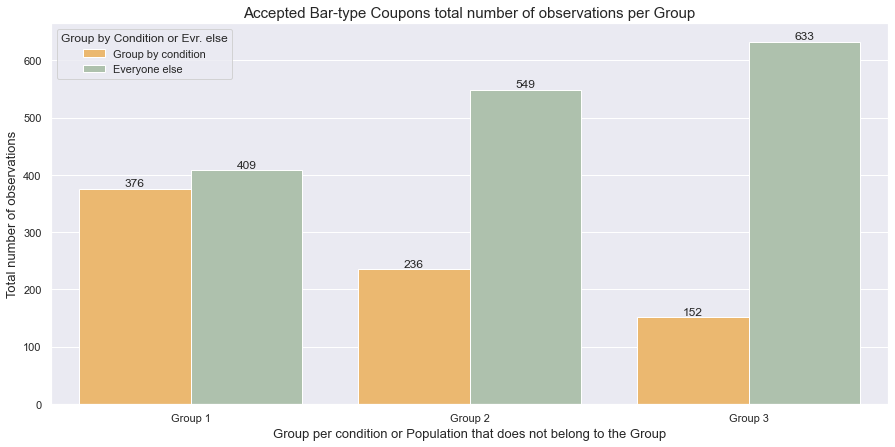

In [69]:
fig, ax = plt.subplots(figsize=(15, 7))

ax = sns.barplot(data = df_toplot_counts,
            x = 'Group',
            y = 'Counts',
            hue = 'Group by Condition or Evr. else',
            palette = ['#FFBB5C','#ABC4AA']   
           )


#inserting count annotations in every bar:
ax.bar_label(ax.containers[0],
             fmt='%.f', label_type='edge')
ax.bar_label(ax.containers[1],
             fmt='%.f', label_type='edge')



plt.title('Accepted Bar-type Coupons total number of observations per Group', fontsize = 15)
plt.xlabel("Group per condition or Population that does not belong to the Group", fontsize = 13)
plt.ylabel("Total number of observations", fontsize = 13)

plt.savefig('plots/Plot6.png', dpi = 200, bbox_inches='tight')
plt.show()

<b> Groups' Description:
- Group 1: Go to bars more than once a month, had passengers that were not a kid, and were not widowed
- Group 2: Go to bars more than once a month and are under the age of 30
- Group 3: Go to cheap restaurants more than 4 times a month and income is less than 50K

<b> Preparing the data fro plotting the percentages (acceptance rates per group):

In [70]:
# preparing the data for plotting  the percentages
# below the dataframe df_toplot_perc contains the melted

df_toplot_perc = pd.melt(temp_results, id_vars=['Group', 'Description'], 
                           
                                          value_vars=['Percentage',
                                                     'Percentage_evr_else'
                                                     ],
                           
                                          var_name='Group by Condition or Evr. else', 
                                          value_name='Percentages'
                          )




df_toplot_perc['Group by Condition or Evr. else'] = df_toplot_perc['Group by Condition or Evr. else'].replace('Percentage', 'Group by condition')

df_toplot_perc['Group by Condition or Evr. else'] = df_toplot_perc['Group by Condition or Evr. else'].replace('Percentage_evr_else', 'Everyone else')

df_toplot_perc['Group'] = df_toplot_perc['Group'].replace('group_1', 'Group 1')
df_toplot_perc['Group'] = df_toplot_perc['Group'].replace('group_2', 'Group 2')
df_toplot_perc['Group'] = df_toplot_perc['Group'].replace('group_3', 'Group 3')

# I will plot only the percentages of Groups
df_toplot_perc.loc[ df_toplot_perc['Group by Condition or Evr. else'] == 'Group by condition' ]

,Group,Description,Group by Condition or Evr. else,Percentages
0,Group 1,"Go to bars more than once a month, had passeng...",Group by condition,47.90
1,Group 2,Go to bars more than once a month and are unde...,Group by condition,30.06
2,Group 3,Go to cheap restaurants more than 4 times a mo...,Group by condition,19.36


<b> Plotting the percentages per Group:

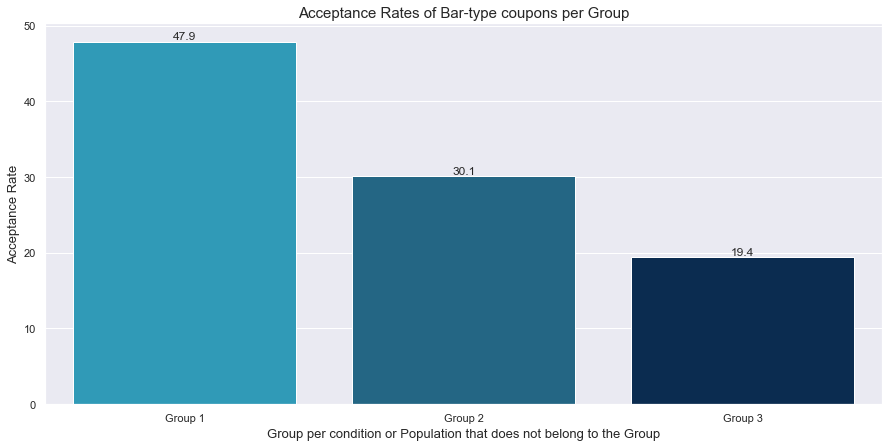

In [71]:
fig, ax = plt.subplots(figsize=(15, 7))

ax = sns.barplot(data = df_toplot_perc.loc[ df_toplot_perc['Group by Condition or Evr. else'] == 'Group by condition' ],
            x = 'Group',
            y = 'Percentages',
            palette = ['#19A7CE','#146C94','#002B5B']   
           )


ax.bar_label(ax.containers[0],
             fmt='%.1f', label_type='edge')

plt.title('Acceptance Rates of Bar-type coupons per Group', fontsize = 15)
plt.xlabel("Group per condition or Population that does not belong to the Group", fontsize = 13)
plt.ylabel("Acceptance Rate", fontsize = 13)

plt.savefig('plots/Plot7.png', dpi = 200, bbox_inches='tight')
plt.show()

<b> Groups' Description:
- Group 1: Go to bars more than once a month, had passengers that were not a kid, and were not widowed
- Group 2: Go to bars more than once a month and are under the age of 30
- Group 3: Go to cheap restaurants more than 4 times a month and income is less than 50K

# 
### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

<B> Below I create a dataframe that contains percentage results for bar-coupons:

In [72]:
# inserting results to dictionary:

dict_temp_2 = {
        "Acceptance rate of Bar Coupons":
                [bar_2, 
                 bar_3_less,
                 bar_3_more,
                 bar_4,
                 bar_5,
                 bar_6_condition1,
                 bar_6_condition2,
                 bar_6_condition3 
                 ],

        "Classes":
                ['Class 1', 
                 'Class 2',
                 'Class 3',
                 'Class 4',
                 'Class 5',
                 'Class 6',
                 'Class 7',
                 'Class 8',
                 ],        
    
        "Rate Description":
                ["Acceptance rate of Bar-type coupons (in relation to total accepted coupons)",
                 "Acceptance rate of Bar-type coupons (drivers who went to a bar 3 or fewer times a month)",
                 "Acceptance rate of Bar-type coupons (drivers who went to a bar 4 or more times a month)",
                 "Acceptance rate of Bar-type coupons (drivers who go to a bar more than once a month and are over the age of 25)",
                 "Acceptance rate of Bar-type coupons (drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry)",
                 "Acceptance rate of Bar-type coupons (drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed)",
                 "Acceptance rate of Bar-type coupons (drivers who go to bars more than once a month and are under the age of 30)",
                 "Acceptance rate of Bar-type coupons (drivers who go to cheap restaurants more than 4 times a month and income is less than 50K)"
                ]
    
        }

# converting dictionary to dataframe:
temp_results_2 = pd.DataFrame.from_dict(dict_temp_2)

temp_results_2

,Acceptance rate of Bar Coupons,Classes,Rate Description
0,11.501832,Class 1,Acceptance rate of Bar-type coupons (in relati...
1,81.273885,Class 2,Acceptance rate of Bar-type coupons (drivers w...
2,18.726115,Class 3,Acceptance rate of Bar-type coupons (drivers w...
3,35.414013,Class 4,Acceptance rate of Bar-type coupons (drivers w...
4,47.898089,Class 5,Acceptance rate of Bar-type coupons (drivers w...
5,47.898089,Class 6,Acceptance rate of Bar-type coupons (drivers w...
6,30.063694,Class 7,Acceptance rate of Bar-type coupons (drivers w...
7,19.363057,Class 8,Acceptance rate of Bar-type coupons (drivers w...


<b> Plotting the acceptance rates in a sorted order:

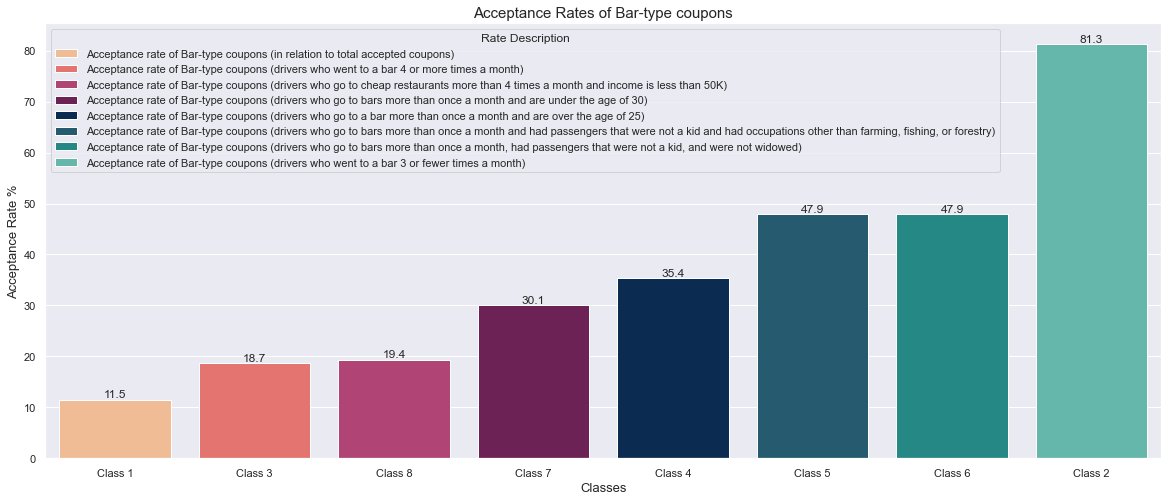

In [73]:
fig, ax = plt.subplots(figsize=(20, 8))

ax = sns.barplot(data = temp_results_2.sort_values(by ='Acceptance rate of Bar Coupons') , 
                    x = 'Classes',
                    y = 'Acceptance rate of Bar Coupons',
                    hue = 'Rate Description',
                    dodge=False,
                    palette = ['#FFBA86','#F6635C','#C23373','#79155B','#002B5B','#1A5F7A','#159895','#57C5B6']
                   )

for i in range(0,8):
    ax.bar_label(ax.containers[i],
             fmt='%.1f', label_type='edge') #annotating every bar 


plt.title('Acceptance Rates of Bar-type coupons', fontsize = 15)
plt.xlabel("Classes", fontsize = 13)
plt.ylabel("Acceptance Rate %", fontsize = 13)

plt.savefig('plots/Plot8.png', dpi = 200, bbox_inches='tight')
plt.show()

<b> The acceptance rate of Bar-type coupons for drivers who went to a bar 3 or fewer times a month (class 2) is the highest among the other classes. I will investigate further how the visiting frequency impacts the acceptance rate for bar-type coupons:

In [74]:
df_bar

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,3,2,1,80,10,Bar,24h,0,21,11,...,1,3,3,1,1,0,0,0,1,1
35,1,1,1,55,18,Bar,24h,0,21,11,...,1,3,3,1,1,0,0,1,0,1
39,2,1,1,55,7,Bar,24h,0,21,11,...,1,3,3,1,1,1,1,0,1,1
46,3,2,1,80,10,Bar,24h,0,46,11,...,3,2,2,0,1,0,0,0,1,0
57,1,1,1,55,18,Bar,24h,0,46,11,...,3,2,2,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,3,2,1,80,22,Bar,24h,0,26,11,...,0,2,3,2,1,1,0,0,1,0
12664,3,2,1,55,22,Bar,2h,0,26,11,...,0,2,3,2,1,1,0,0,1,0
12667,3,1,2,55,10,Bar,24h,0,26,11,...,0,2,3,2,1,1,0,0,1,0
12670,3,4,2,55,18,Bar,2h,0,26,11,...,0,2,3,2,1,1,0,0,1,0


<b> Remind myself the mapping of Visit frequency in Bars:
- never: 0
- less1: 1
- 1-3: 2
- 4-8: 3
- gt8: 4

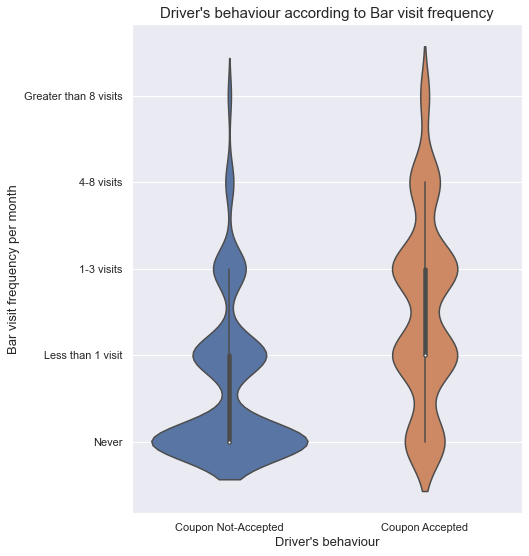

In [75]:
#preparing lists to transform x/y ticks in the plot
xlabels = ['Coupon Not-Accepted','Coupon Accepted']
x = [0,1]

y = [0,1,2,3,4]
ylabels = ['Never','Less than 1 visit','1-3 visits','4-8 visits','Greater than 8 visits']

# creating a violin plot
plt.figure(figsize = (7,9))

ax = sns.violinplot(data = df_bar,
            x = 'Y',
            y = 'Bar'
           )

plt.xticks(x, labels = xlabels, rotation='horizontal')
plt.yticks(y, labels = ylabels, rotation='horizontal')

plt.title("Driver's behaviour according to Bar visit frequency", fontsize = 15)
plt.xlabel("Driver's behaviour", fontsize = 13)
plt.ylabel("Bar visit frequency per month", fontsize = 13)

plt.savefig('plots/Plot9.png', dpi = 200, bbox_inches='tight')
plt.show()



<b> Insight: <br>
- Indeed, drivers who visit a bar more than once a month tend to accept the bar-type coupon. People who do not visit or visit a bar less than one time per month tend not to accept the bar-type coupon. To further investigate it, I will analyse how the time, passenger and destination affect the behaviour of the user:

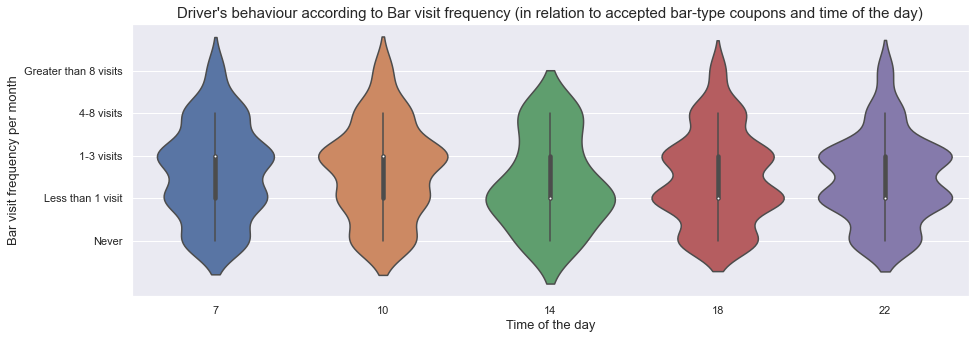

In [76]:
#preparing lists to transform x/y ticks in the plot
y = [0,1,2,3,4]
ylabels = ['Never','Less than 1 visit','1-3 visits','4-8 visits','Greater than 8 visits']


# creating a violin plot
plt.figure(figsize = (15,5))

fig.tight_layout(pad=5.0)

ax = sns.violinplot(data = df_bar.query('Y==1'),
            x = 'time',
            y = 'Bar',
            gap=2
           )


plt.yticks(y, labels = ylabels, rotation='horizontal')

plt.title("Driver's behaviour according to Bar visit frequency (in relation to accepted bar-type coupons and time of the day)", fontsize = 15)
plt.xlabel("Time of the day", fontsize = 13)
plt.ylabel("Bar visit frequency per month", fontsize = 13)

plt.savefig('plots/Plot10.png', dpi = 200, bbox_inches='tight')
plt.show()

<b>Insights:
- There is a slightly bigger frequency for people who go to Bars 1 to 3 times per month in the morning hours (7, 10). In the afternoon (14), people who tend to accept bar-type coupons go to a bar less than once per month. The same pattern is noticed for the night hours. 

<b> The above patterns could be useful for when to send the bar-type coupon offer.

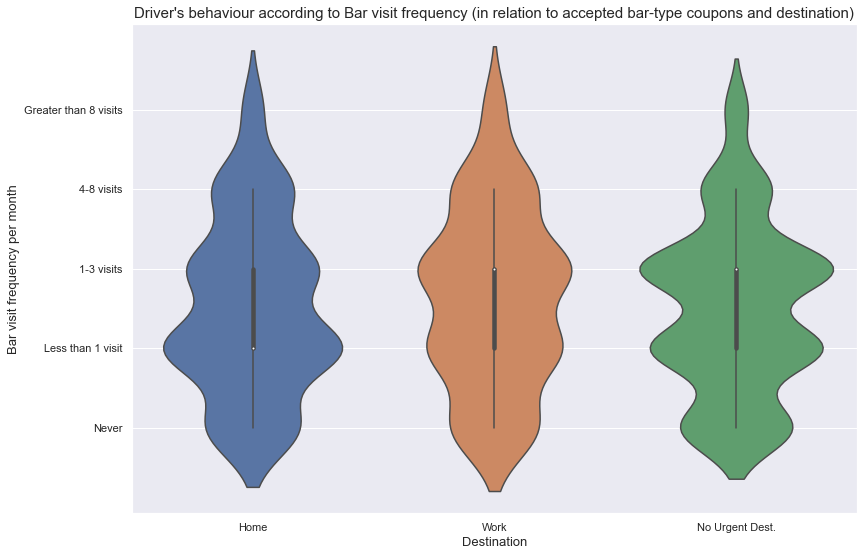

In [77]:
xlabels = ['Home','Work', 'No Urgent Dest.']
x = [0,1,2]

y = [0,1,2,3,4]
ylabels = ['Never','Less than 1 visit','1-3 visits','4-8 visits','Greater than 8 visits']

# creating a violin plot
plt.figure(figsize = (13,9))

ax = sns.violinplot(data = df_bar.query('Y==1'),
            x = 'destination',
            y = 'Bar'
           )

plt.xticks(x, labels = xlabels, rotation='horizontal')
plt.yticks(y, labels = ylabels, rotation='horizontal')

plt.title("Driver's behaviour according to Bar visit frequency (in relation to accepted bar-type coupons and destination)", fontsize = 15)
plt.xlabel("Destination", fontsize = 13)
plt.ylabel("Bar visit frequency per month", fontsize = 13)

plt.savefig('plots/Plot11.png', dpi = 200, bbox_inches='tight')
plt.show()


<b> Insights: <br>
    
- Drivers who go to their Home and tend to visit a bar less than once per month have a higher frequency of accepted coupons than drivers who go to their Home and have other visit frequencies to a bar. 
    
- In addition, drivers with no urgent destination, whose bar visit frequencies are less than once per month and one to three visits per month, tend to have a high frequency of accepted coupons.

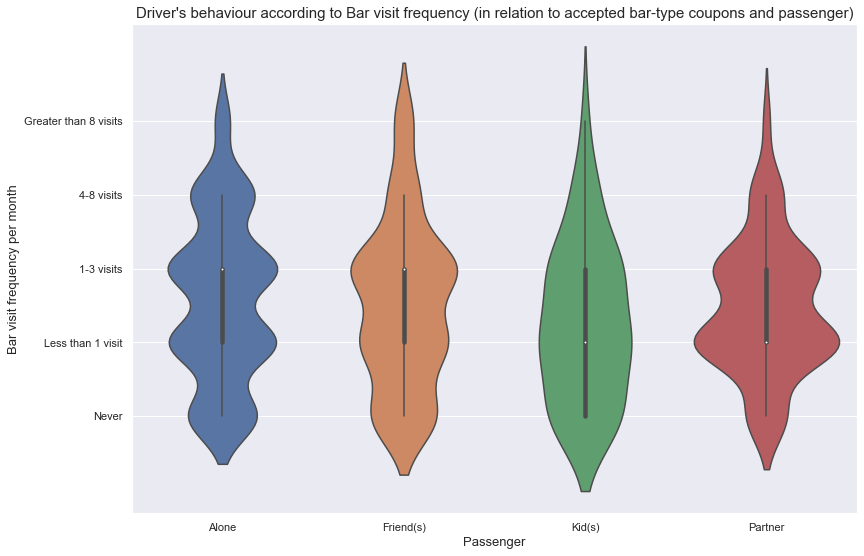

In [78]:
xlabels = ['Alone','Friend(s)', 'Kid(s)','Partner']
x = [0,1,2,3]

y = [0,1,2,3,4]
ylabels = ['Never','Less than 1 visit','1-3 visits','4-8 visits','Greater than 8 visits']

# creating a violin plot
plt.figure(figsize = (13,9))

ax = sns.violinplot(data = df_bar.query('Y==1'),
            x = 'passenger',
            y = 'Bar'
           )

plt.xticks(x, labels = xlabels, rotation='horizontal')
plt.yticks(y, labels = ylabels, rotation='horizontal')

plt.title("Driver's behaviour according to Bar visit frequency (in relation to accepted bar-type coupons and passenger)", fontsize = 15)
plt.xlabel("Passenger", fontsize = 13)
plt.ylabel("Bar visit frequency per month", fontsize = 13)

plt.savefig('plots/Plot12.png', dpi = 200, bbox_inches='tight')
plt.show()

<b> Insights:<br>
- Drivers alone in the car whose bar visit frequency is less than once per month or one to three times, have a higher frequency of accepted coupons.
    
- Drivers with friends in the car whose bar visit frequency is one to three times have a higher frequency of accepted coupons.
    
- Drivers with their partner in the car whose bar visit frequency is less than once per month have a higher frequency of accepted coupons.



## Independent Investigation

### Using the bar coupon example as motivation, I will explore one of the other coupon groups and will try to determine the characteristics of passengers who accept the coupons.  

#### Let's investigate the coupon group: 'restaurants with an average expense of less than 20 $'

In [79]:
# creation of a dataframe that only contains coupons of type "Restauran Less than 20"
df_rest20 =  df.query('coupon == "Restaurant(<20)"')

# keeping only the accepted coupon
df_rest20_accepted = df_rest20.query('Y == 1')

#check - number of rows and columns:
print('df_rest20: ' + str(df_rest20.shape))
print('df_rest20_accepted: '+ str(df_rest20_accepted.shape))

df_rest20: (2646, 25)
df_rest20_accepted: (1878, 25)


<b> Calculation of acceptance rates in relation to total coupons and total accepted coupons:

In [80]:
# acceptance rate in relation to total coupons:
proportion_accepted_rest20_1 = (df_rest20_accepted.shape[0] / df.shape[0])*100  #accept the coupon

proportion_NOTaccepted_rest20_1 = (100 - proportion_accepted_rest20_1) # do not accept the coupon


# acceptance rate in relation to total ACCEPTED coupons:
proportion_accepted_rest20_2 = (df_rest20_accepted.shape[0] / df.query('Y == 1').shape[0])*100  #accept the coupon

proportion_NOTaccepted_rest20_2 = (100 - proportion_accepted_bar2) # do not accept the coupon

<b> Printing the calculated results:

In [81]:
print('The proportion of the restaurants with an average expense of less than 20$ coupons that were accepted (in relation to total Coupons): {}%'.format(np.round(proportion_accepted_rest20_1, 2)) )
print('\n')
print('The proportion of the restaurants with an average expense of less than 20$ coupons that were NOT accepted (in relation to total Coupons): {}% '.format(np.round(proportion_NOTaccepted_rest20_1, 2)))
print('\n-----------------\n')
print('The proportion of the restaurants with an average expense of less than 20$ coupons that were accepted (in relation to total Accepted Coupons): {}%'.format(np.round(proportion_accepted_rest20_2, 2)) )
print('\n')
print('The proportion of the restaurants with an average expense of less than 20$ coupons that were NOT accepted (in relation to total Accepted Coupons): {}%'.format(np.round(proportion_NOTaccepted_rest20_2, 2)))

The proportion of the restaurants with an average expense of less than 20$ coupons that were accepted (in relation to total Coupons): 15.64%


The proportion of the restaurants with an average expense of less than 20$ coupons that were NOT accepted (in relation to total Coupons): 84.36% 

-----------------

The proportion of the restaurants with an average expense of less than 20$ coupons that were accepted (in relation to total Accepted Coupons): 27.52%


The proportion of the restaurants with an average expense of less than 20$ coupons that were NOT accepted (in relation to total Accepted Coupons): 88.5%


<b> Creating pie plots to better communicate the results:

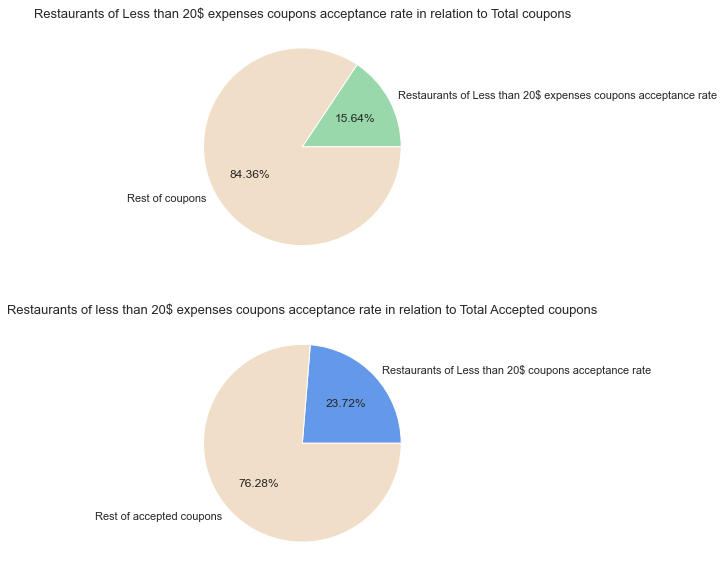

In [82]:
# in relation to total Coupons
labels = ['Restaurants of Less than 20$ expenses coupons acceptance rate', 'Rest of coupons']
results1 = [proportion_accepted_rest20_1, proportion_NOTaccepted_rest20_1]

fig, axes = plt.subplots(2,1, figsize=(5,10))
axes[0].pie(results1,
            colors = ['#98D8AA','#F1DEC9'], #color palette
            labels=labels, # labels
            autopct='%.2f%%' #formatting and placing percentage annotations
            )

axes[0].set_title('Restaurants of Less than 20$ expenses coupons acceptance rate in relation to Total coupons',
                 fontsize = 13)




# in relation to total Accepted Coupons
labels = ['Restaurants of Less than 20$ coupons acceptance rate', 'Rest of accepted coupons']

results2 = [proportion_accepted_rest20_2, proportion_NOTaccepted_rest20_2]


axes[1].pie(results2,
            colors = ['#6499E9','#F1DEC9'],
            labels=labels,
            autopct='%.2f%%'
            )

axes[1].set_title('Restaurants of less than 20$ expenses coupons acceptance rate in relation to Total Accepted coupons',
                 fontsize = 13)


plt.savefig('plots/Plot13.png', dpi = 200, bbox_inches='tight')
plt.show()

<b> Investigating the variables of temperature and time subjected to drivers' acceptance behaviour (accepted coupons)

In [83]:
for_plotting = df_rest20_accepted[['time',
                                   'passenger', 
                                   'temperature', 
                                   'weather', 
                                   'age',
                                   'RestaurantLessThan20',
                                   'Y']]

for_plotting

,time,passenger,temperature,weather,age,RestaurantLessThan20,Y
22,14,1,55,1,21,3,1
29,14,2,80,1,21,3,1
31,18,2,80,1,21,3,1
42,7,1,55,1,21,3,1
44,14,1,55,1,46,2,1
...,...,...,...,...,...,...,...
12662,18,2,80,1,26,3,1
12666,14,2,30,3,26,3,1
12668,10,1,80,1,26,3,1
12671,10,4,30,3,26,3,1


In [84]:
# creating a dataframe ready for a grouped bar plot
# grouping data by time and temperature and applying an aggregation function (count)
for_plotting.groupby(['time','temperature']).count().reset_index()

,time,temperature,passenger,weather,age,RestaurantLessThan20,Y
0,7,30,47,47,47,47,47
1,7,55,181,181,181,181,181
2,7,80,92,92,92,92,92
3,10,30,49,49,49,49,49
4,10,55,23,23,23,23,23
5,10,80,134,134,134,134,134
6,14,30,66,66,66,66,66
7,14,55,225,225,225,225,225
8,14,80,246,246,246,246,246
9,18,30,24,24,24,24,24


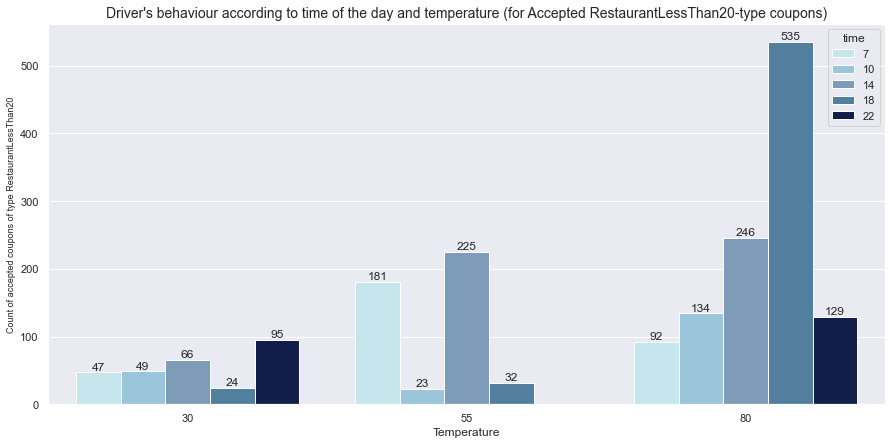

In [85]:
fig, ax = plt.subplots(figsize=(15, 7))


sns.barplot(data = for_plotting.groupby(['time','temperature']).count().reset_index(),
            x = 'temperature',
            y = 'Y',
            hue = 'time',
            ax = ax,
            palette = ['#BFEAF5', '#91C8E4', '#749BC2', '#4682A9', '#071952'])

# annotating the bars:
ax.bar_label(ax.containers[0],
             fmt='%.f', label_type='edge')
ax.bar_label(ax.containers[1],
             fmt='%.f', label_type='edge')
ax.bar_label(ax.containers[2],
             fmt='%.f', label_type='edge')
ax.bar_label(ax.containers[3],
             fmt='%.f', label_type='edge')
ax.bar_label(ax.containers[4],
             fmt='%.f', label_type='edge')

# creating labels and the title:
plt.title("Driver's behaviour according to time of the day and temperature (for Accepted RestaurantLessThan20-type coupons)",
          fontsize = 14)

plt.ylabel("Count of accepted coupons of type RestaurantLessThan20",
           fontsize = 9)

plt.xlabel("Temperature",
           fontsize = 12)


plt.savefig('plots/Plot14.png', dpi = 200, bbox_inches='tight')
plt.show()

<b> Insights:
- It seems that more people accept the coupons in higher temperatures (80).
- Also, on hot days, the time with the most significant count of accepted coupons for cheap restaurants is 18:00.
- For the days when the temperature is 55, the highest counts are in the morning (07:00) and at 14:00.

<b> Investigating the variables of passenger and time subjected to drivers' acceptance behaviour (accepted coupons)

In [86]:
# creating a dataframe ready for a grouped bar plot
# grouping data by time and passenger and applying an aggregation function (count)
for_plotting.groupby(['time','passenger']).count().reset_index()[['passenger','time','Y']].head(5)

,passenger,time,Y
0,1,7,320
1,1,10,85
2,2,10,46
3,3,10,50
4,4,10,25


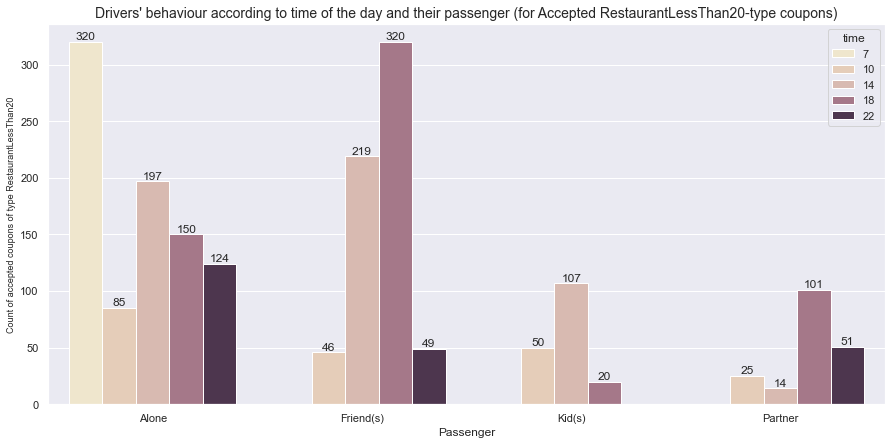

In [87]:
fig, ax = plt.subplots(figsize=(15, 7))


sns.barplot(data = for_plotting.groupby(['time','passenger']).count().reset_index()[['passenger','time','Y']],
            x = 'passenger',
            y = 'Y',
            hue = 'time',
            ax = ax,
            palette = ['#F5E8C7', '#ECCCB2', '#DEB6AB', '#AC7088', '#513252'])


# annotating the bars
ax.bar_label(ax.containers[0],
             fmt='%.f', label_type='edge')
ax.bar_label(ax.containers[1],
             fmt='%.f', label_type='edge')
ax.bar_label(ax.containers[2],
             fmt='%.f', label_type='edge')
ax.bar_label(ax.containers[3],
             fmt='%.f', label_type='edge')
ax.bar_label(ax.containers[4],
             fmt='%.f', label_type='edge')



# changing the x-tick labels:
xlabels = ['Alone','Friend(s)', 'Kid(s)','Partner']
x = [0,1,2,3]
plt.xticks(x, labels = xlabels, rotation='horizontal')

# applying titles and axis labels:
plt.title("Drivers' behaviour according to time of the day and their passenger (for Accepted RestaurantLessThan20-type coupons)",
          fontsize = 14)

plt.ylabel("Count of accepted coupons of type RestaurantLessThan20",
           fontsize = 9)

plt.xlabel("Passenger",
           fontsize = 12)


plt.savefig('plots/Plot15.png', dpi = 200, bbox_inches='tight')
plt.show()

<b> Insights:
- Users who are Alone or with Friends have higher frequencies of accepted coupons for cheap restaurants.
- In particular, users who drive Alone have a high frequency of accepted coupons in the early morning hours (07:00) 
- In addition, users who drive with Friends have a high frequency of accepted coupons for 18:00.
- Both of the above classes/groups also have a high frequency of accepted coupons at 14:00.

<b> Investigating the variables of passenger and restaurant visit frequency (RestaurantLessThan20) subjected to drivers' acceptance behaviour (accepted coupons)

In [88]:
# creating a dataframe ready for a grouped bar plot
# grouping data by restaurant visit frequency and passenger and applying an aggregation function (count)
for_plotting.groupby(['RestaurantLessThan20','passenger']).count().reset_index()[['passenger','RestaurantLessThan20','Y']].head(5)

,passenger,RestaurantLessThan20,Y
0,1,0,13
1,2,0,9
2,3,0,2
3,4,0,3
4,1,1,146


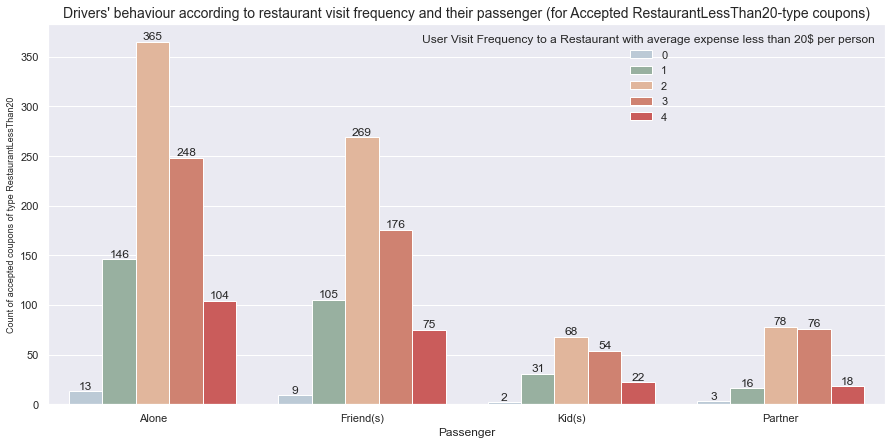

In [89]:

xlabels = ['Alone','Friend(s)', 'Kid(s)','Partner']
x = [0,1,2,3]



fig, ax = plt.subplots(figsize=(15, 7))


sns.barplot(data = for_plotting.groupby(['RestaurantLessThan20','passenger']
                                       ).count().reset_index()[['passenger','RestaurantLessThan20','Y']],
            x = 'passenger',
            y = 'Y',
            hue = 'RestaurantLessThan20',
            ax = ax,
            palette = ['#B7CADB', '#94B49F', '#ECB390', '#DF7861', '#DD4A48'])


# annotating the bars
ax.bar_label(ax.containers[0],
             fmt='%.f', label_type='edge')
ax.bar_label(ax.containers[1],
             fmt='%.f', label_type='edge')
ax.bar_label(ax.containers[2],
             fmt='%.f', label_type='edge')
ax.bar_label(ax.containers[3],
             fmt='%.f', label_type='edge')
ax.bar_label(ax.containers[4],
             fmt='%.f', label_type='edge')



# changing the x-tick labels:
xlabels = ['Alone','Friend(s)', 'Kid(s)','Partner']
x = [0,1,2,3]
plt.xticks(x, labels = xlabels, rotation='horizontal')


# applying titles and axis labels:
plt.title("Drivers' behaviour according to restaurant visit frequency and their passenger (for Accepted RestaurantLessThan20-type coupons)",
          fontsize = 14)

plt.ylabel("Count of accepted coupons of type RestaurantLessThan20",
           fontsize = 9)

plt.xlabel("Passenger",
           fontsize = 12)

# applying legend title, locking its position, removing it's frame:
plt.legend(
           title='User Visit Frequency to a Restaurant with average expense less than 20$ per person',
           loc='upper right',
           frameon = False
          )


plt.savefig('plots/Plot16.png', dpi = 200, bbox_inches='tight')
plt.show()

<b> Restaurants with average expense less than 20$ per person - values mapping:

- Never: 0
- Less than 1: 1
- 1-3: 2
- 4-8: 3
- Greater than 8: 4

<b> Insight:
    
- The following trend is noticed for every type of passenger the driver is with. Users tend to accept the restaurant coupons when their restaurant visit frequency is 1-3 times, followed by 4-8 times.
    
<b> I should validate the above insight by calculating the acceptance restaurant coupon rate for every passenger type in restaurant with average expense less than 20$ per person coupons:

Creating the conditions that will be applied on the dataframe `df_rest20`:



In [90]:
# accepted coupon, restaurant visit frequency is 1-3 times per month, passenger type is changing:
condition_accepted_alone = 'Y == 1 & RestaurantLessThan20 == 2 & passenger == 1'

condition_accepted_friend = 'Y == 1 & RestaurantLessThan20 == 2 & passenger == 2'

condition_accepted_kids = 'Y == 1 & RestaurantLessThan20 == 2 & passenger == 3'

condition_accepted_partner = 'Y == 1 & RestaurantLessThan20 == 2 & passenger == 4'

<b> <font color='red'>CAUTION:<font>
    
The calculations are in relation with the total accepted restaurant(<20) coupons:



In [91]:
# Creating functions for easier implemenation
# Callculated Acceptance rate is in relation to total accepted restaurant(low expenses) coupons:

def calculation_rate_restaurants(condition):
    
    df_temp = df_rest20.query(condition).shape[0] #counting the rows of dataframe based on condition
    
    result_condition = (df_temp / df_rest20.query('Y == 1').shape[0])*100  # accept the coupon: condition

    result_other = (100 - result_condition) #accept the coupon: other
    
    return result_condition, result_other  



# plotting pie chart function 
def pie_rate_restaurants(conditioned_result, other_result, label, title):
    
    labels = [label, 'Rest of accepted coupons']
    
    results1 = [conditioned_result, other_result]

    plt.figure(figsize=(5,10))
    plt.pie(results1,
            colors = ['#98D8AA','#F1DEC9'], #color palette
            labels=labels, # labels
            autopct='%.2f%%' #formatting and placing percentage annotations
        )

    plt.title(title, fontsize = 13)
    
    plt.show()
    return  

In [92]:
# calculating results based on the above conditions:
alone, other_than_alone = calculation_rate_restaurants(condition_accepted_alone)

friend, other_than_friend = calculation_rate_restaurants(condition_accepted_friend)

kids, other_than_kids = calculation_rate_restaurants(condition_accepted_kids)

partner, other_than_partner = calculation_rate_restaurants(condition_accepted_partner)


<b> The results demonstrated on the pie plots below should follow the trend of the grouped bar plot above

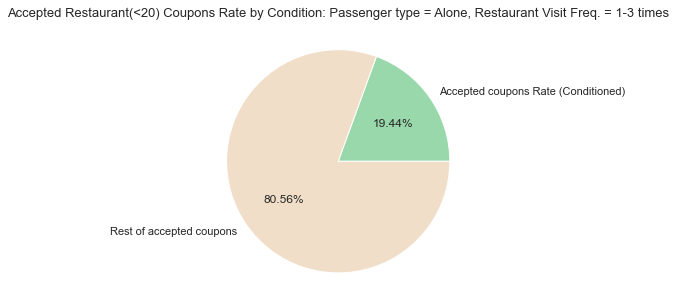

In [93]:
pie_rate_restaurants(conditioned_result = alone, 
                     other_result = other_than_alone,
                     label = 'Accepted coupons Rate (Conditioned)'
                     ,title = 'Accepted Restaurant(<20) Coupons Rate by Condition: Passenger type = Alone, Restaurant Visit Freq. = 1-3 times'
                    )

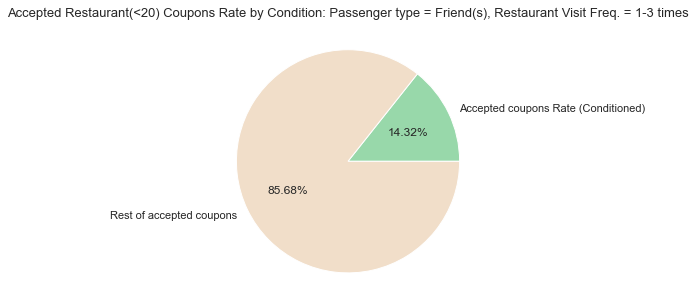

In [94]:
pie_rate_restaurants(conditioned_result = friend, 
                     other_result = other_than_friend,
                     label = 'Accepted coupons Rate (Conditioned)'
                     ,title = 'Accepted Restaurant(<20) Coupons Rate by Condition: Passenger type = Friend(s), Restaurant Visit Freq. = 1-3 times'
                    )

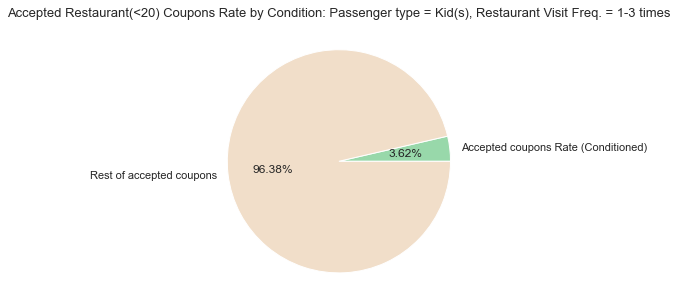

In [95]:
pie_rate_restaurants(conditioned_result = kids, 
                     other_result = other_than_kids,
                     label = 'Accepted coupons Rate (Conditioned)'
                     ,title = 'Accepted Restaurant(<20) Coupons Rate by Condition: Passenger type = Kid(s), Restaurant Visit Freq. = 1-3 times'
                    )

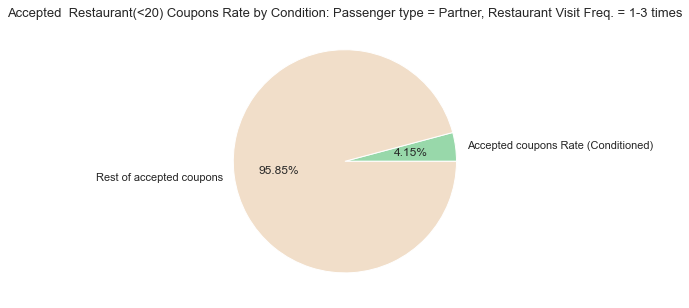

In [96]:
pie_rate_restaurants(conditioned_result = partner, 
                     other_result = other_than_partner,
                     label = 'Accepted coupons Rate (Conditioned)'
                     ,title = 'Accepted  Restaurant(<20) Coupons Rate by Condition: Passenger type = Partner, Restaurant Visit Freq. = 1-3 times'
                    )

<b> Further analysis could be done to validate the coupon acceptance rate trend on other visit frequencies, such as 4-8 times.

## Summarising Results - Next steps and Recommendations

### Summarising Results:

<b>The data frame contains:
- 12684 rows in the dataset
- 26 features in the dataset

<b>The data were cleaned appropriately:
- The rows that contained duplicates (74 rows) were dropped. 
- The rows that contained missing values (603 rows) were dropped.
- The feature/column car was dropped as it was problematic.

<b> Transformations of values were implemented in the following features:
- destination
- passenger
- weather
- time
- gender
- age
- maritalStatus
- expiration
- education
- income
- Bar
- CoffeeHouse
- CarryAway
- RestaurantLessThan20
- Restaurant20To50

<b>For example, the Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50 columns were transformed as:
    
- never: 0
- less1: 1
- 1-3: 2
- 4-8: 3
- gt8: 4


<b> Insights:

- Of the total observations, 57% of the coupons were accepted by the user.
- The coupon type with the highest count of coupons is Coffee House, followed by Restaurants(<20) ( Restaurants with average expense less than 20 $ per person)
- The coupon types with the highest counts of accepted coupon are both Coffee House and Restaurants(<20)
Most observations had a temperature of 80.

### As for Bar type Coupons:
- In relation to total coupons, only 6.5% of Bar-type coupons were accepted. In relation to total accepted coupons, the acceptance grows to 11.5%

<b>In addition, some groups were created to investigate further the acceptance rates of Bar-type coupons. The groups are demonstrated below:

- Drivers who went to a bar 3 or fewer times a month
- Drivers who went to a bar 4 or more times a month
- Drivers who go to a bar more than once a month and are over the age of 25
- Drivers who go to bars more than once a month and had passengers who were not a kid and had occupations other than farming, fishing, or forestry
- Drivers who go to bars more than once a month, had passengers that were not a kid and were not widowed
- Drivers who go to bars more than once a month and are under the age of 30
- Drivers who go to cheap restaurants more than 4 times a month and earn less than 50K.
    
<b>Note:
- The analysis was conducted in relation to the total accepted Bar-type coupons.     

<b> The group with the most significant acceptance rate is the drivers who went to a bar 3 or fewer times a month. This insight led to further analysis of the visit frequency in Accepted Bar-type coupons.


<b> Some additional insights:
    
- Drivers who visit a bar more than once a month tend to accept the bar-type coupon. People who do not visit or visit a bar less than one time per month tend not to accept the bar-type coupon. To further investigate it, I will analyse how the time, passenger and destination affect the behaviour of the user.
    
- There is a slightly bigger frequency of accepted coupons for people who go to Bars 1 to 3 times per month in the morning hours (07:00, 10:00). In the afternoon (14:00), people who tend to accept bar-type coupons go to a bar less than once per month. The same pattern is noticed for the night hours.
    
- Drivers who go to their Home and tend to visit a bar less than once per month have a higher frequency of accepted coupons than drivers who go to their Home and have other visit frequencies to a bar.
    
- In addition, drivers with no urgent destination, whose bar visit frequencies are less than once per month and one to three visits per month, tend to have a high frequency of accepted coupons.
    
- Drivers alone in the car whose bar visit frequency is less than once per month or one to three times, have a higher frequency of accepted coupons.
    
- Drivers with friends in the car whose bar visit frequency is one to three times have a higher frequency of accepted coupons.
    
- Drivers with their partner in the car whose bar visit frequency is less than once per month have a higher frequency of accepted coupons.

### As for Restaurant (<20) type Coupons :

- The proportion of the restaurants with an average expense of less than 20 $ coupons that were accepted (in relation to total Coupons): 15.64%

- The proportion of the restaurants with an average expense of less than 20 $ coupons that were accepted (in relation to total Accepted Coupons): 27.52%

<b> Additional insights - Investigating the variables of temperature and time subjected to drivers' acceptance behaviour (in relation to accepted coupons):

- It seems that more people accept the coupons in higher temperatures (80).
- Also, on hot days, the time with the most significant count of accepted coupons for cheap restaurants is 18:00.
- For the days when the temperature is 55, the highest counts are in the morning (07:00) and at 14:00.

<b> Additional insights - Investigating the variables of passenger and time subjected to drivers' acceptance behaviour (accepted coupons):

- Users who are Alone or with Friends have higher frequencies of accepted coupons for cheap restaurants.
- In particular, users who drive Alone have a high frequency of accepted coupons in the early morning hours (07:00).
- In addition, users who drive with Friends have a high frequency of accepted coupons for 18:00.
- Both of the above classes/groups also have a high frequency of accepted coupons at 14:00.

<b> Additional insights - Investigating the variables of passenger and restaurant visit frequency (Restaurant(<20) subjected to drivers' acceptance behaviour (accepted coupons) ):

- Users tend to accept the restaurant coupons when their restaurant visit frequency is 1-3 times, followed by 4-8 times.

## Next steps and Recommendations

<b> This dataset is analysed and is ready to be inserted into a predictive model. 
- Of course, more sophisticated data transformations could be implemented in order to make it even more "understandable" by an ML model (feature engineering).

<b> According to the analysis conducted, the features that should be used as inputs to a ML models are:
    
- The Bar and Restaurant(<20) visit frequency
- The temperature
- The time of the day the coupon was sent 
- The destination
- And probably the passenger type                             

In order to additionally validate the decision to choose the above features, further analysis should be conducted between other features such as: Occupation, type of coupon and visit frequency in expensive restaurants. Also, an analysis of income and visit frequencies in various places could be conducted. 

In [97]:
print("Notebook runs without errors")

Notebook runs without errors
